<a href="https://colab.research.google.com/github/nirmalghimire/MARSI_Metaanalysis/blob/main/SORS_Metaanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Python program is designed to analyze and visualize data from two research instruments, SORS (Survey of Reading Strategies) and MARSI (Metacognitive Awareness of Reading Strategies Inventory). It loads data from Excel files, cleans and standardizes the data, and then performs various analyses, including descriptive statistics and the creation of graphs to understand the distribution of different variables within the datasets. The program also generates frequency tables and summary statistics for specific columns, providing insights into the research findings related to gender, constructs, teaching/learning, and other relevant aspects.**

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# File paths for the two Excel files
sors_file_path = '/content/drive/My Drive/MARSI/Sors_modified.xlsx'
marsi_file_path = '/content/drive/My Drive/MARSI/MARSI-modified.xlsx'


In [ ]:
# Load the Excel files into pandas DataFrames
sors_data = pd.read_excel(sors_file_path)
marsi_data = pd.read_excel(marsi_file_path)

In [ ]:
# Load the Excel files into pandas DataFrames
sors_data = pd.read_excel(sors_file_path)
marsi_data = pd.read_excel(marsi_file_path)

In [ ]:
# Check the first few rows of sors datafile
print("First few rows of Sors_modified.xlsx:")
print(sors_data.head())

First few rows of Sors_modified.xlsx:
  SORS Version              Author/s  Year Research Design  \
0        SORS   Abi, M., & Komur, S.  2018    Quantitative   
1        SORS    Abu-Snoubar, T. K.   2017    Quantitative   
2        SORS        Ahmad, S. M. S.  2015     Qualitative   
3        SORS             Ahmed, R.   2019    Mixed method   
4        SORS            Ahmed, R. M  2020    Quantitative   

  Interventi(Yes/No)                                  Interevention Note  \
0                 Yes  Yes, the study involved an intervention in the...   
1                  NO                                                NaN   
2                  NO                                                NaN   
3                  NO                                                NaN   
4                  NO                                                NaN   

  Translation (Yes/No) Translated Language (if any) Modification  \
0                   NO                          NaN           NO

In [ ]:
# Check the first few rows of marsi data
print("\nFirst few rows of MARSI-modified.xlsx:")
print(marsi_data.head())


First few rows of MARSI-modified.xlsx:
  MARSi Version                     Author/s  Year Research Design  \
0         MARSI  Dabarera, Renandya, & Zhang  2014    Mixed-method   
1         MARSI                   Aini,Darus  2020    Mixed-method   
2         MARSI                     Alami,M.  2016    Quantitative   
3         MARSI               Albazi &shukri  2016    Mixed-method   
4         MARSI      Al-dawaideh & al- saadi  2013    Quantitative   

  Interventi(Yes/No)  Interevention Note Translation (Yes/No)  \
0                  No                NaN                   No   
1                  No                NaN                   No   
2                  No                NaN                  Yes   
3                  No                NaN                  Yes   
4                  No                NaN                  Yes   

  Translated Language (if any) Modification       Modification Note (if any)  \
0                          NaN           No                         

In [ ]:
print(marsi_data.columns)

Index(['MARSi Version', 'Author/s', 'Year', 'Research Design',
       'Interventi(Yes/No) ', 'Interevention Note', 'Translation (Yes/No)',
       'Translated Language (if any)', 'Modification',
       'Modification Note (if any)', 'Construct Validation (Yes/No)',
       'Study Location', 'Participants' Native Language', 'Participant Type',
       'Special Notes on Sample (if any)', 'Total Participants', 'Male',
       'Female', 'Minimum', 'Maximum', 'Average',
       'Dependent/output measures Measures', 'Main Findings Related to Gender',
       'Main Findings Related to Construct',
       'Main Findings Related to  Teaching/Learning', 'Main Findings Other'],
      dtype='object')


In [ ]:
# Replace spaces with underscores
marsi_data.columns = marsi_data.columns.str.replace(' ', '_')
sors_data.columns = sors_data.columns.str.replace(' ', '_')
# Convert names to lowercase
marsi_data.columns = marsi_data.columns.str.lower()
sors_data.columns = sors_data.columns.str.lower()
# Remove special characters
marsi_data.columns = marsi_data.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
sors_data.columns = sors_data.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
# Additional replacements for specific characters
marsi_data.columns = marsi_data.columns.str.replace('[()/]', '', regex=True)
sors_data.columns = sors_data.columns.str.replace('[()/]', '', regex=True)
# Print cleaned column names
print(marsi_data.columns)
print(sors_data.columns)

Index(['marsi_version', 'authors', 'year', 'research_design',
       'interventiyesno_', 'interevention_note', 'translation_yesno',
       'translated_language_if_any', 'modification',
       'modification_note_if_any', 'construct_validation_yesno',
       'study_location', 'participants_native_language', 'participant_type',
       'special_notes_on_sample_if_any', 'total_participants', 'male',
       'female', 'minimum', 'maximum', 'average',
       'dependentoutput_measures_measures', 'main_findings_related_to_gender',
       'main_findings_related_to_construct',
       'main_findings_related_to__teachinglearning', 'main_findings_other'],
      dtype='object')
Index(['sors_version', 'authors', 'year', 'research_design',
       'interventiyesno_', 'interevention_note', 'translation_yesno',
       'translated_language_if_any', 'modification',
       'modification_note_if_any', 'construct_validation_yesno',
       'study_location', 'participants_native_language', 'participant_type',
   

In [ ]:
# Function to standardized categorical columns
def standardize_categorical(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower().str.strip()
    return df

In [ ]:
# Standardize categorical columns for both datasets
sors_data = standardize_categorical(sors_data)
marsi_data = standardize_categorical(marsi_data)

In [ ]:
# Summary statistics for both datasets
sors_summary = sors_data.describe(include='all')
marsi_summary = marsi_data.describe(include='all')

In [ ]:
# Display summary statistics
print("Summary statistics for SORS data:")
print(sors_summary)

print("\nSummary statistics for MARSI data:")
print(marsi_summary)

Summary statistics for SORS data:
       sors_version    authors         year research_design interventiyesno_  \
count            46         46    46.000000              46               43   
unique            3         45          NaN               3                2   
top            sors  poole, a.          NaN    quantitative               no   
freq             41          2          NaN              39               36   
mean            NaN        NaN  2014.804348             NaN              NaN   
std             NaN        NaN     4.161301             NaN              NaN   
min             NaN        NaN  2003.000000             NaN              NaN   
25%             NaN        NaN  2012.250000             NaN              NaN   
50%             NaN        NaN  2014.000000             NaN              NaN   
75%             NaN        NaN  2018.000000             NaN              NaN   
max             NaN        NaN  2022.000000             NaN              NaN   

     

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to shorten category descriptions
def shorten_categories(df, column, max_length=50):
    df[column] = df[column].apply(lambda x: x if pd.isna(x) else (x[:max_length] + '...' if len(x) > max_length else x))
    return df

# Function to combine similar categories (case insensitive match)
def combine_similar_categories(df, column, replacements):
    df[column] = df[column].replace(replacements, regex=True)
    return df

# Function to find an empty space for annotations
def find_empty_space(ax):
    y_limits = ax.get_ylim()
    y_range = y_limits[1] - y_limits[0]
    empty_y = y_limits[1] - (0.05 * y_range)
    return empty_y

# Function to plot categorical data with better readability and summary statistics
def plot_categorical_data(df, column, dataset_name):
    # Shorten descriptions
    df = shorten_categories(df, column)

    # Combine similar categories
    replacements = {
        r'\bno\b': 'no',
        r'\byes\b': 'yes'
    }
    df = combine_similar_categories(df, column, replacements)

    # Plot
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column} in {dataset_name}')
    plt.ylabel(column)
    plt.xlabel('Count')

    # Add summary statistics
    total_count = df[column].count()
    unique_count = df[column].nunique()
    try:
        mode_value = df[column].mode()[0]
    except IndexError:
        mode_value = 'N/A'

    empty_y = find_empty_space(ax)
    plt.figtext(0.15, empty_y, f'Total: {total_count}', fontsize=12, ha='left')
    plt.figtext(0.15, empty_y - 0.03, f'Unique: {unique_count}', fontsize=12, ha='left')
    plt.figtext(0.15, empty_y - 0.06, f'Mode: {mode_value}', fontsize=12, ha='left')

    plt.tight_layout()
    plt.show()

# Function to plot dependent measures
def plot_dependent_measures(df, column, dataset_name):
    # Shorten descriptions
    df = shorten_categories(df, column)

    # Combine similar categories
    replacements = {
        r'\bread\b': 'reading',
        r'\btest\b': 'test'
    }
    df = combine_similar_categories(df, column, replacements)

    # Filter out categories with counts less than 2
    counts = df[column].value_counts()
    df = df[df[column].isin(counts[counts >= 2].index)]

    # Plot
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column} in {dataset_name}')
    plt.ylabel(column)
    plt.xlabel('Count')

    # Add summary statistics
    total_count = df[column].count()
    unique_count = df[column].nunique()
    try:
        mode_value = df[column].mode()[0]
    except IndexError:
        mode_value = 'N/A'

    empty_y = find_empty_space(ax)
    plt.figtext(0.15, empty_y, f'Total: {total_count}', fontsize=12, ha='left')
    plt.figtext(0.15, empty_y - 0.03, f'Unique: {unique_count}', fontsize=12, ha='left')
    plt.figtext(0.15, empty_y - 0.06, f'Mode: {mode_value}', fontsize=12, ha='left')

    plt.tight_layout()
    plt.show()

# Function to generate frequency tables for "Main Findings" columns
def generate_frequency_tables(df, columns):
    for column in columns:
        print(f'\nFrequency table for {column}:')
        print(df[column].value_counts())

# Function to display tables for specific data
def display_tables(df, columns):
    for column in columns:
        print(f'\nTable for {column}:')
        print(df[column].describe())

Columns in SORS dataset: Index(['sors_version', 'authors', 'year', 'research_design',
       'interventiyesno_', 'interevention_note', 'translation_yesno',
       'translated_language_if_any', 'modification',
       'modification_note_if_any', 'construct_validation_yesno',
       'study_location', 'participants_native_language', 'participant_type',
       'special_notes_on_sample_if_any', 'total_participants', 'male',
       'female', 'minimum', 'maximum', 'average',
       'dependentoutput_measures_measures', 'main_findings_related_to_gender',
       'main_findings_related_to_construct',
       'main_findings_related_to__teachinglearning', 'main_findings_other'],
      dtype='object')
Columns in MARSI dataset: Index(['marsi_version', 'authors', 'year', 'research_design',
       'interventiyesno_', 'interevention_note', 'translation_yesno',
       'translated_language_if_any', 'modification',
       'modification_note_if_any', 'construct_validation_yesno',
       'study_location', 'par

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


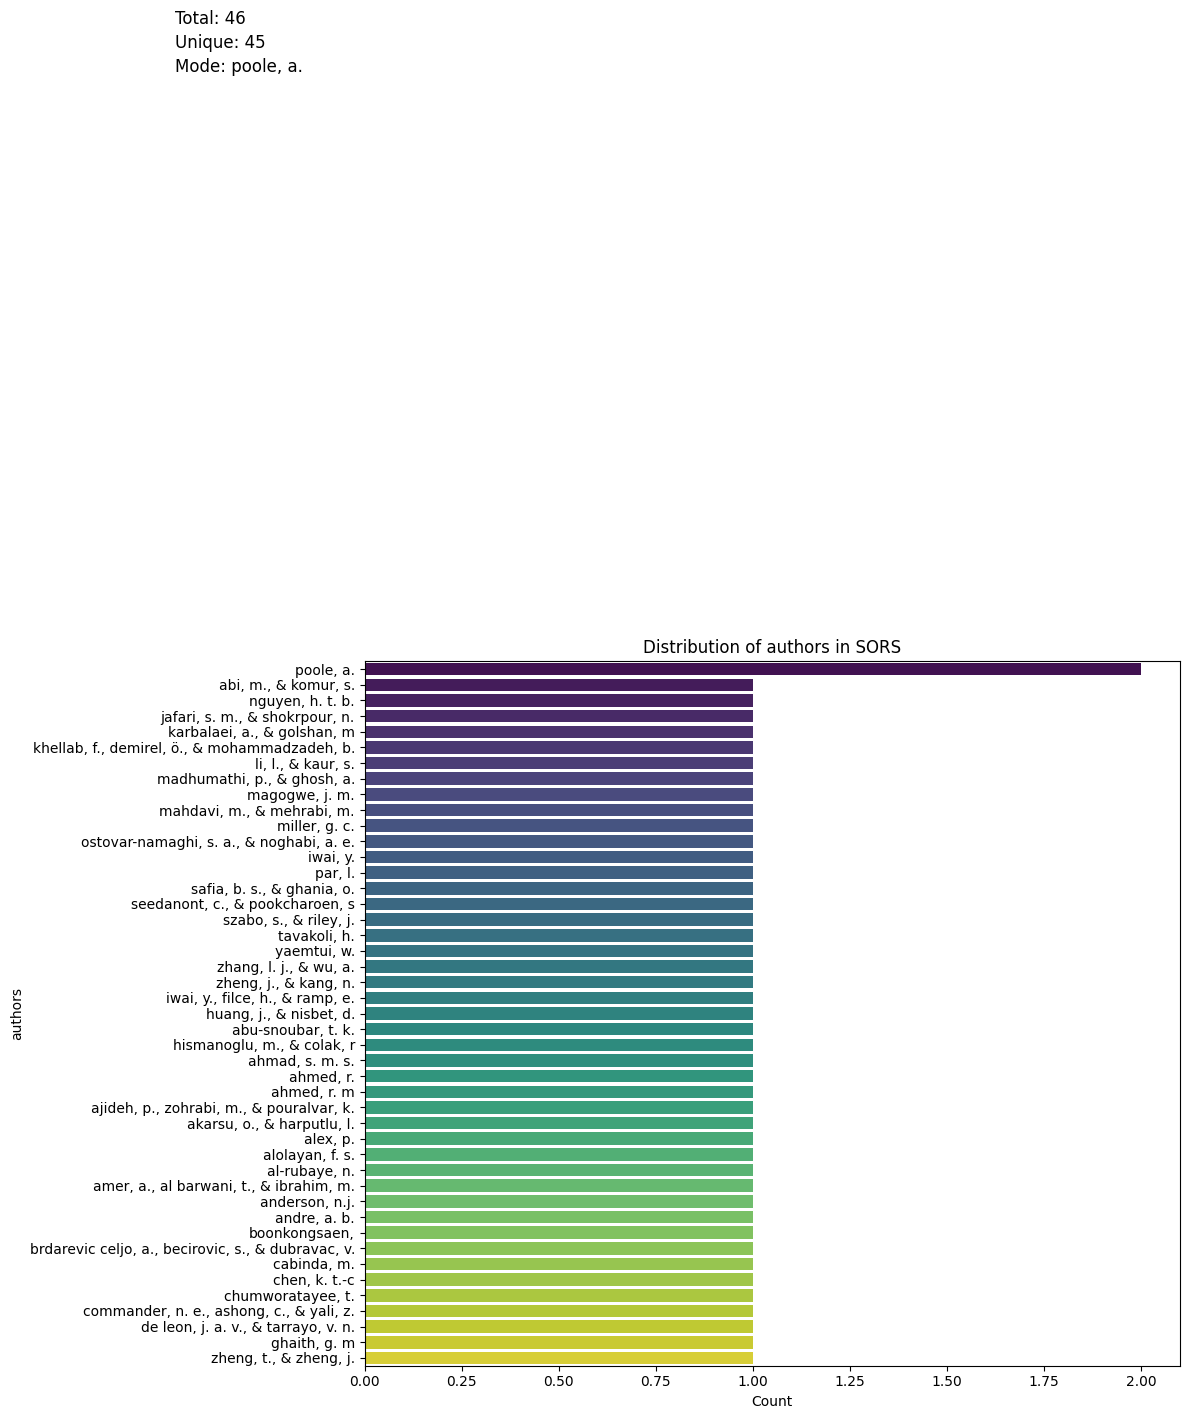

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


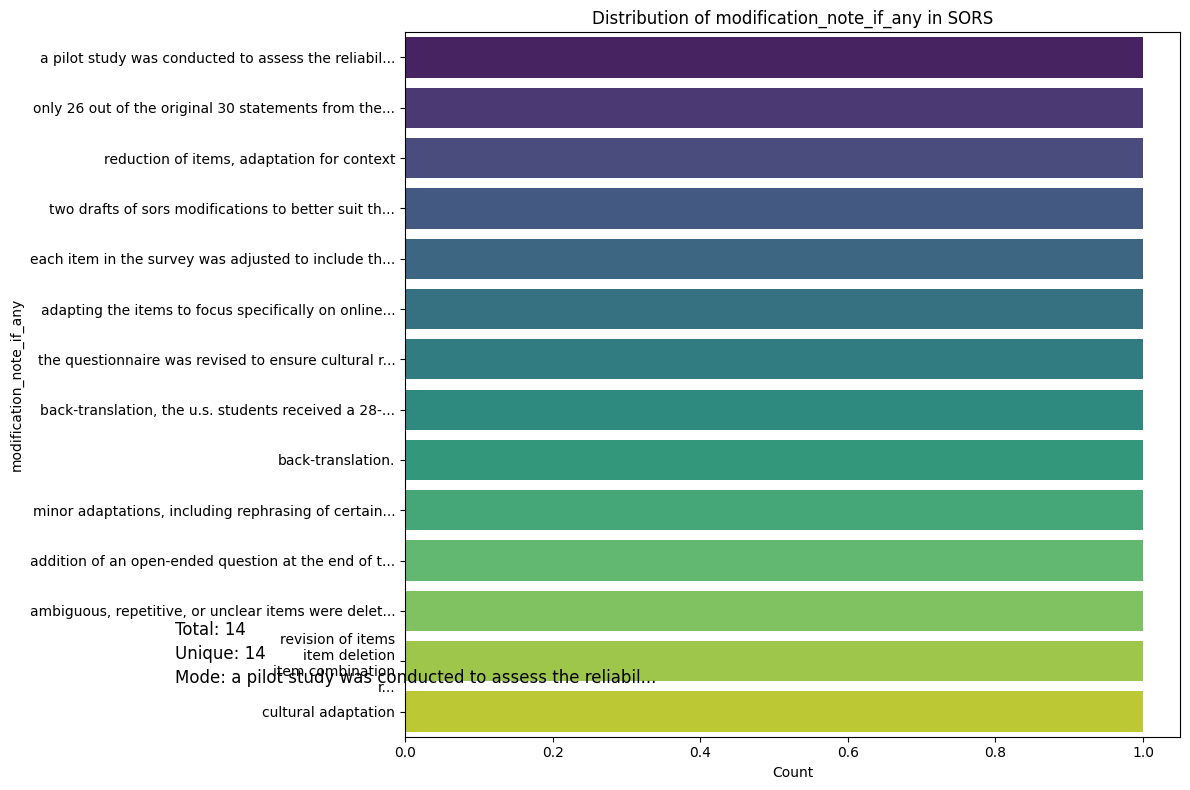

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


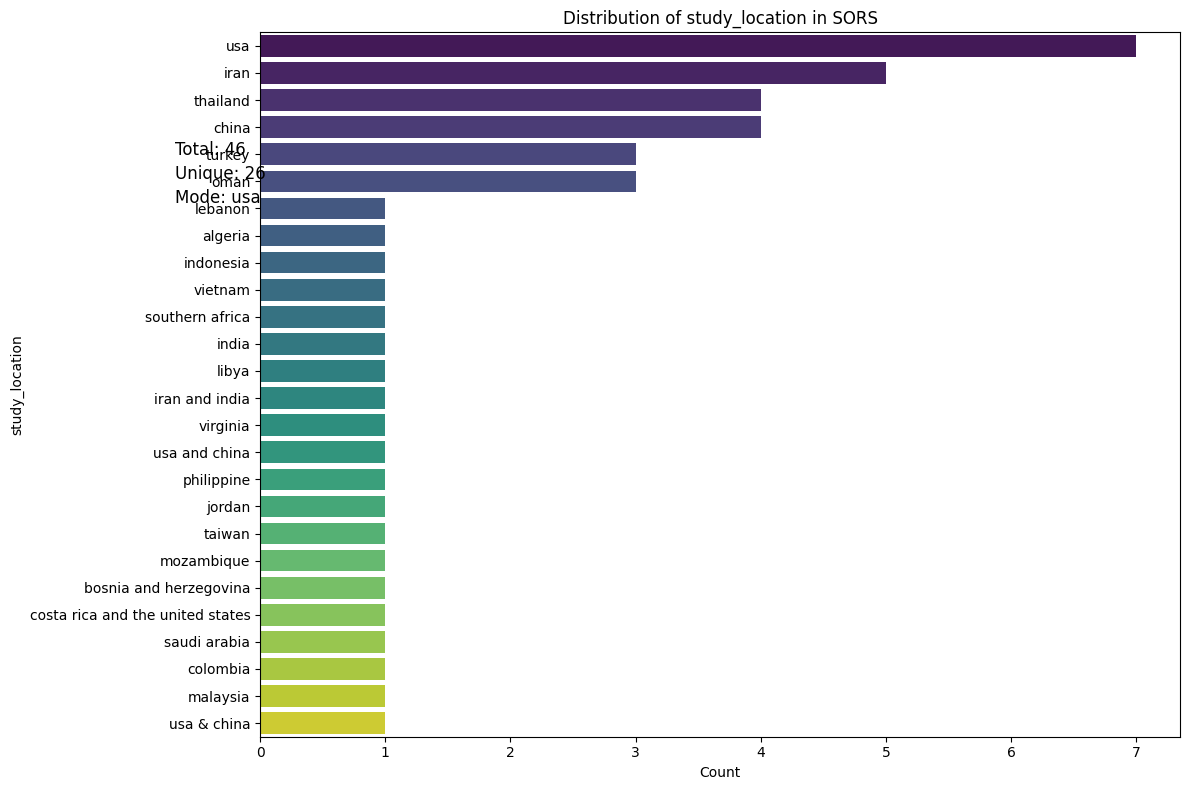

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


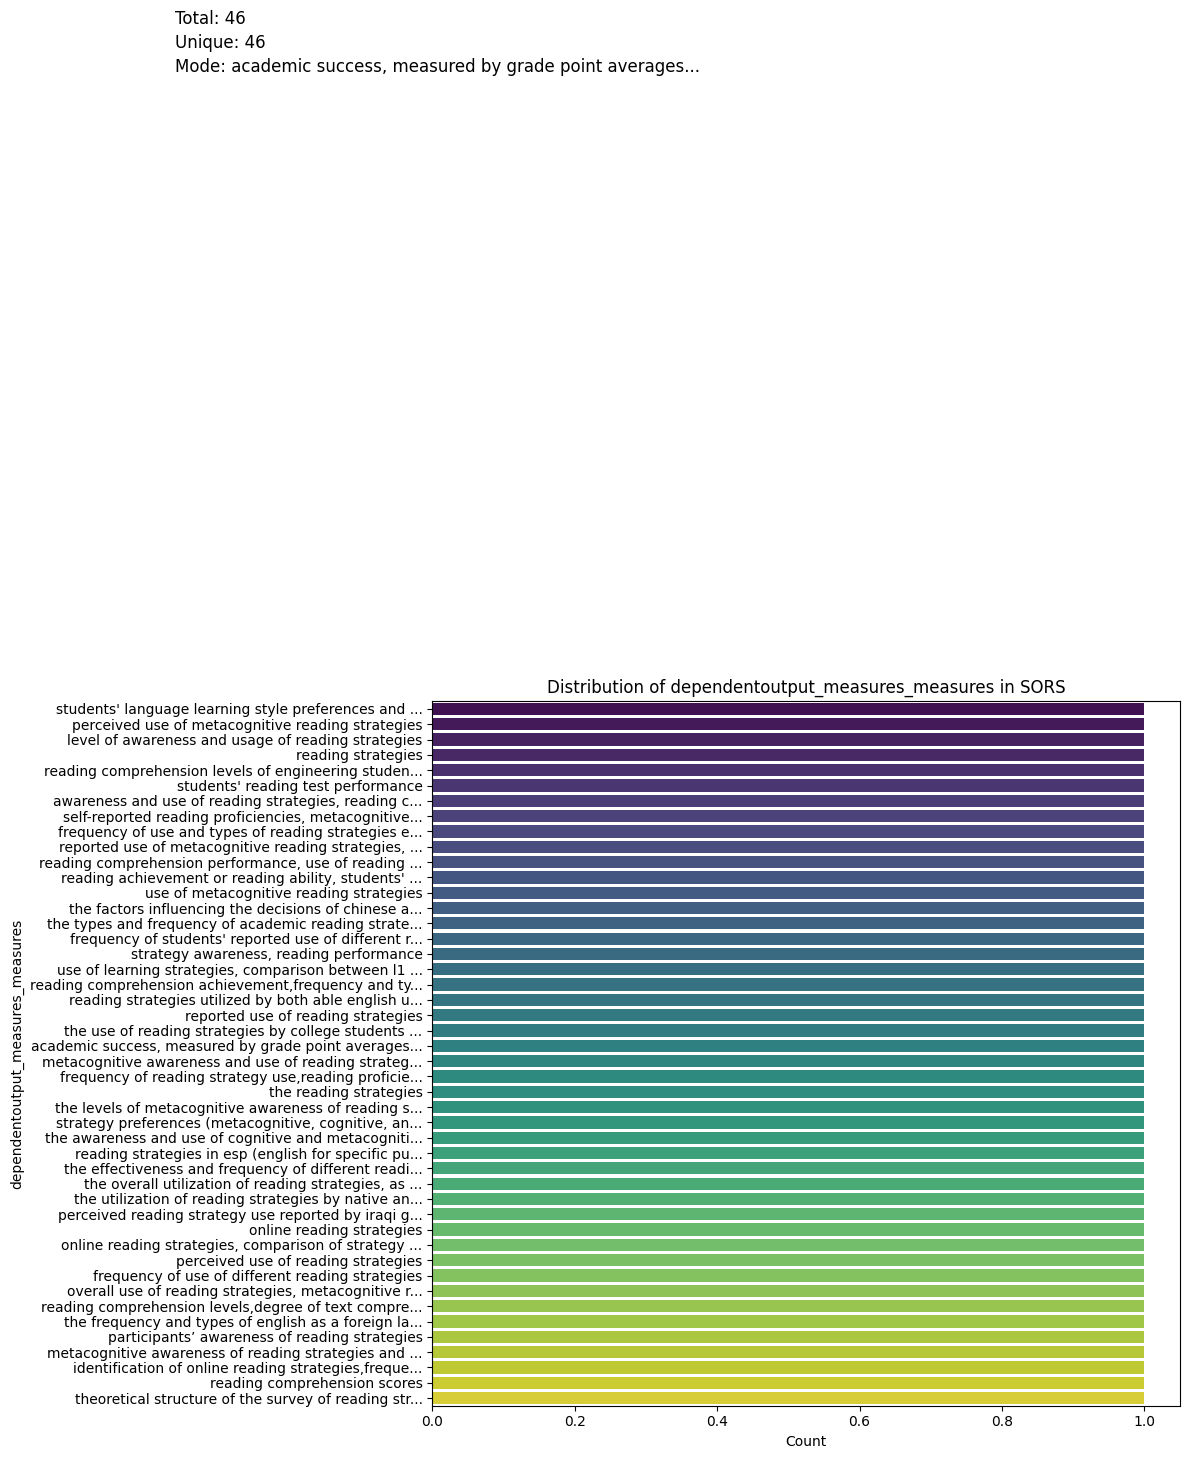

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


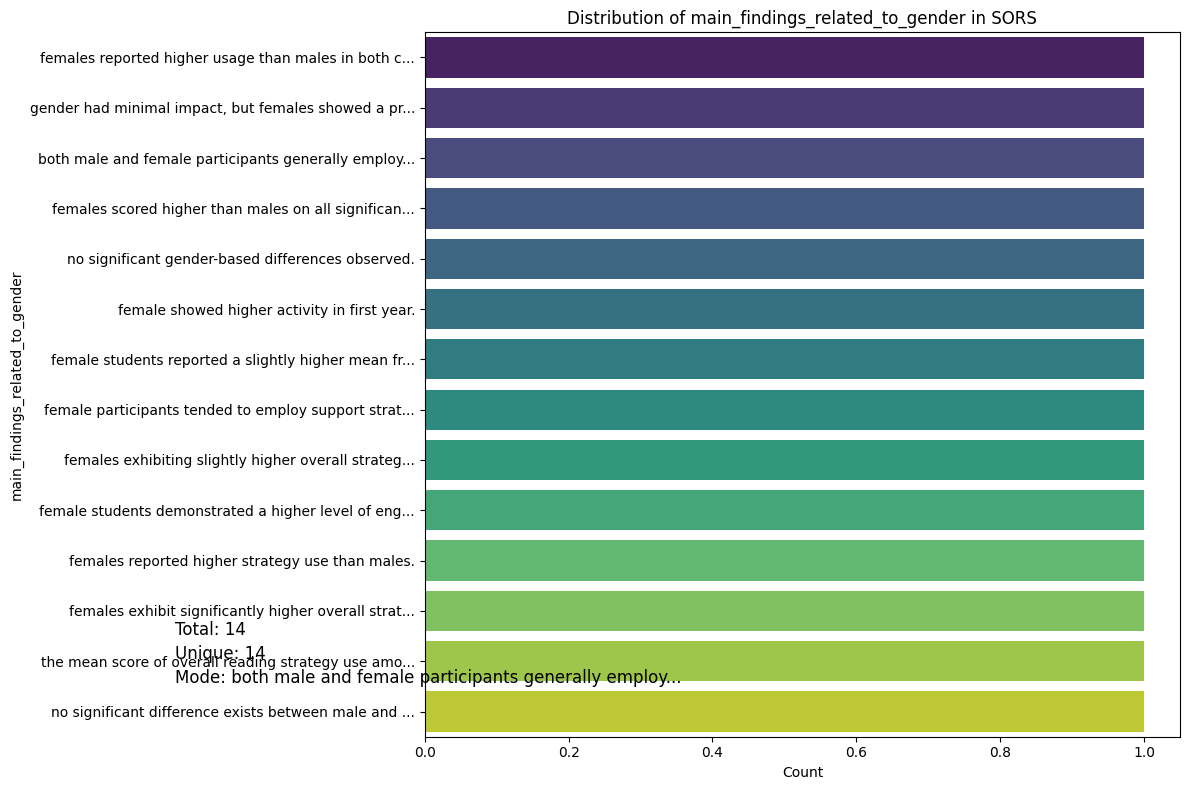

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


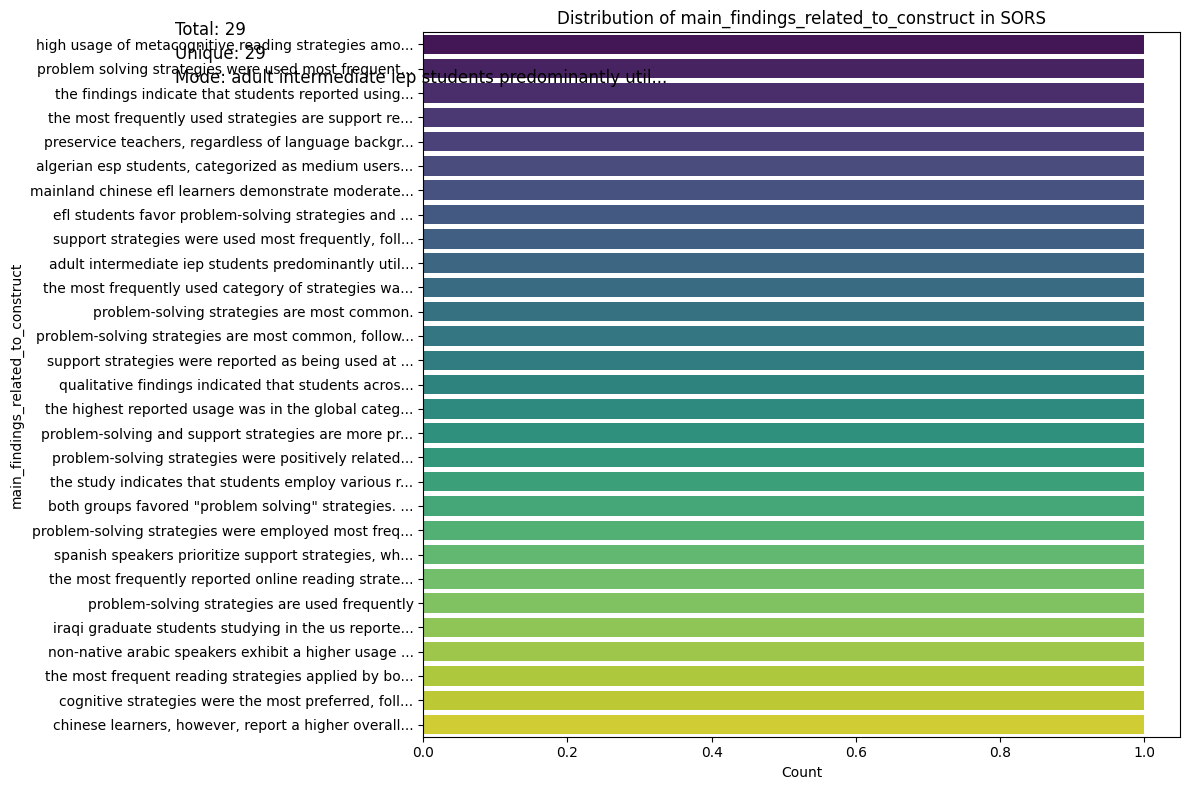

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


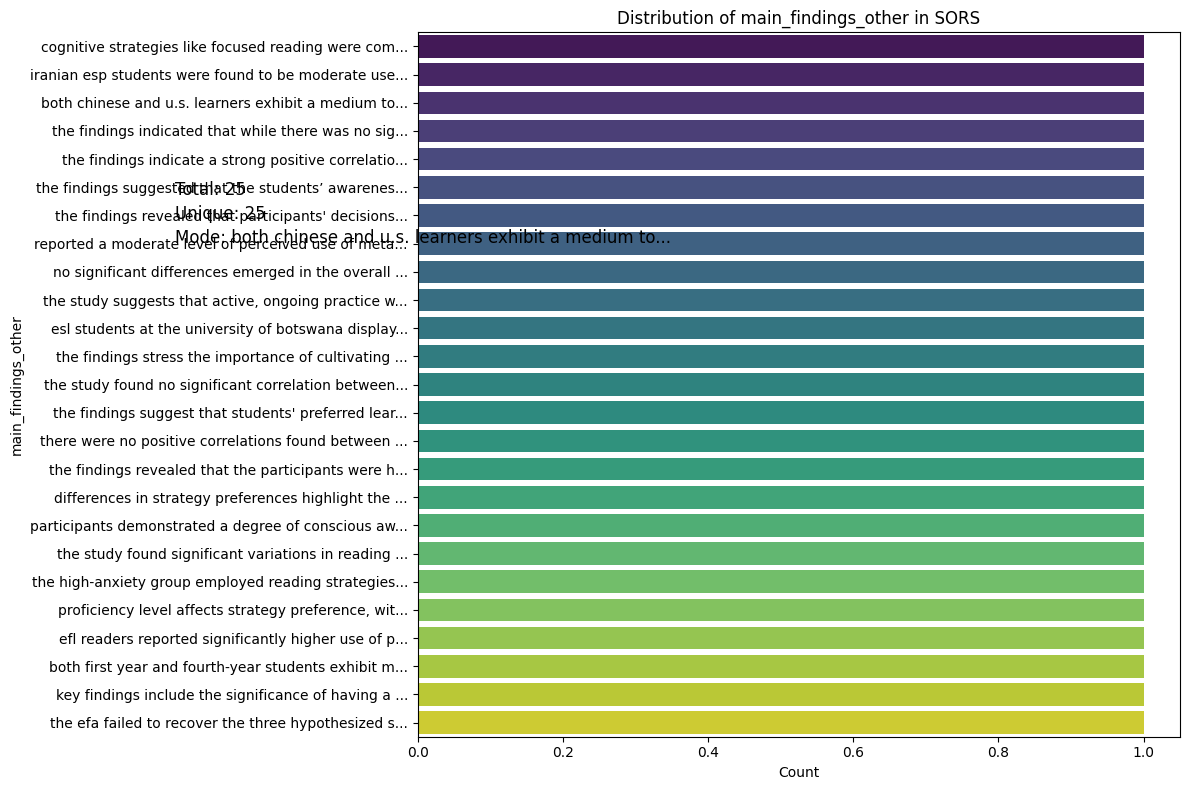

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


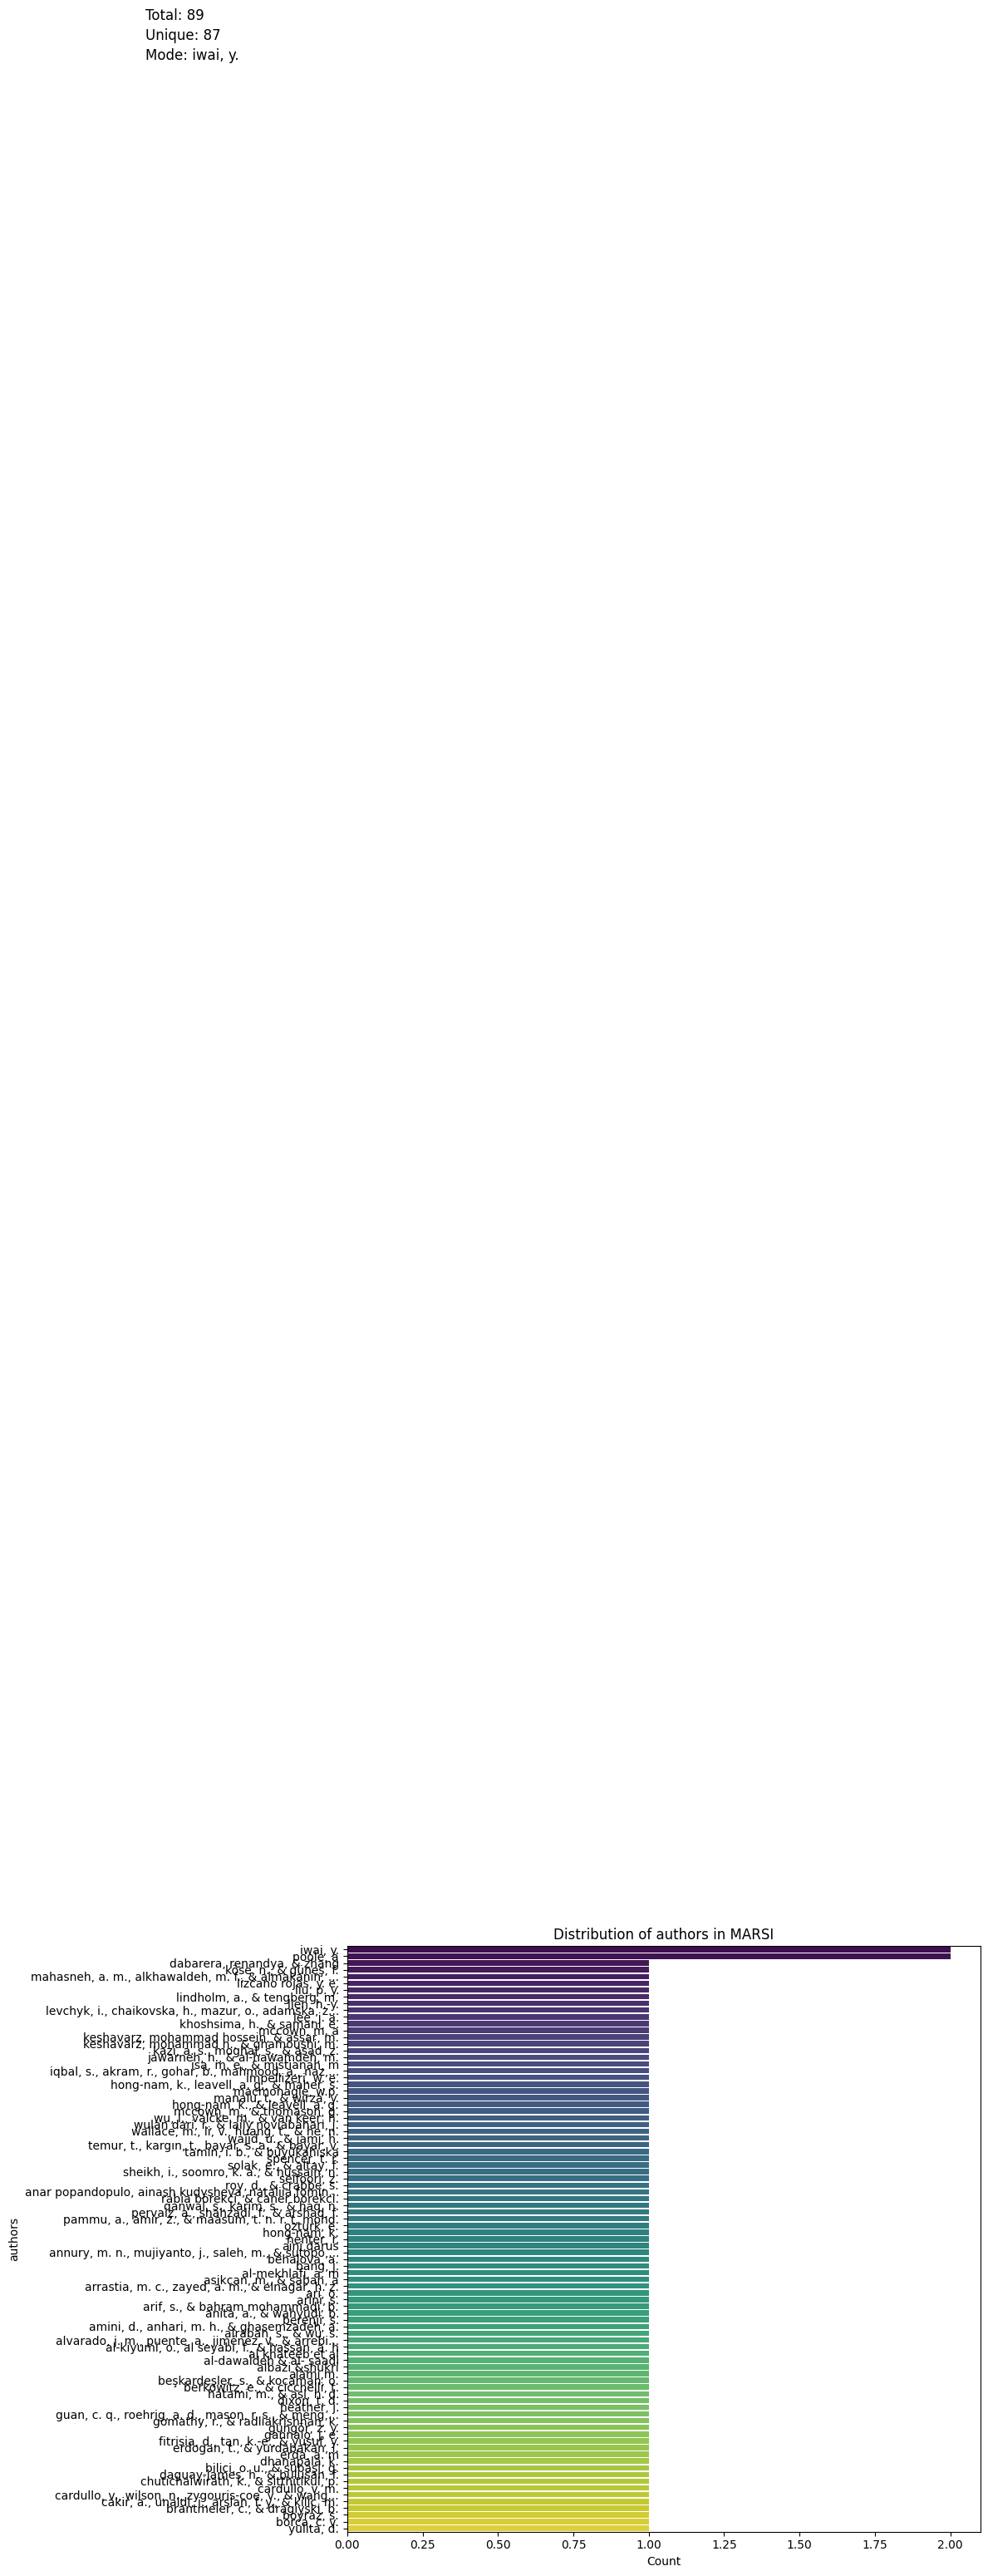

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


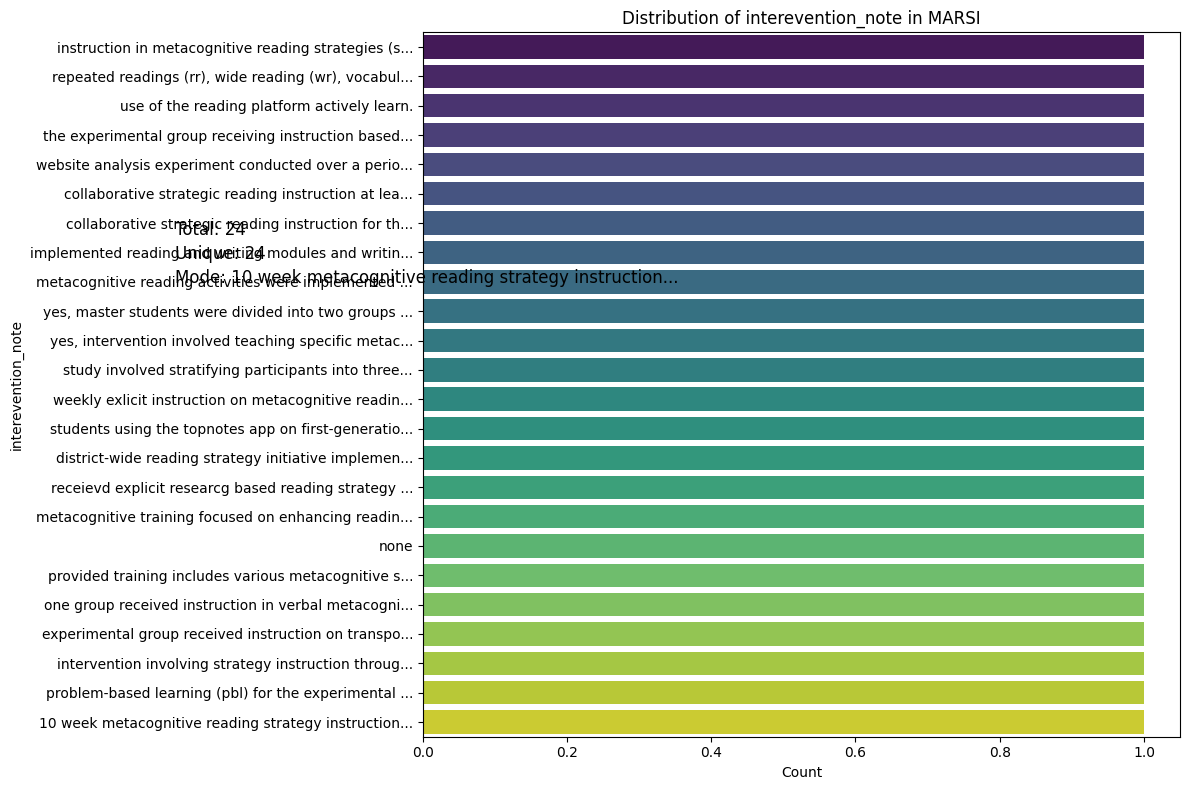

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


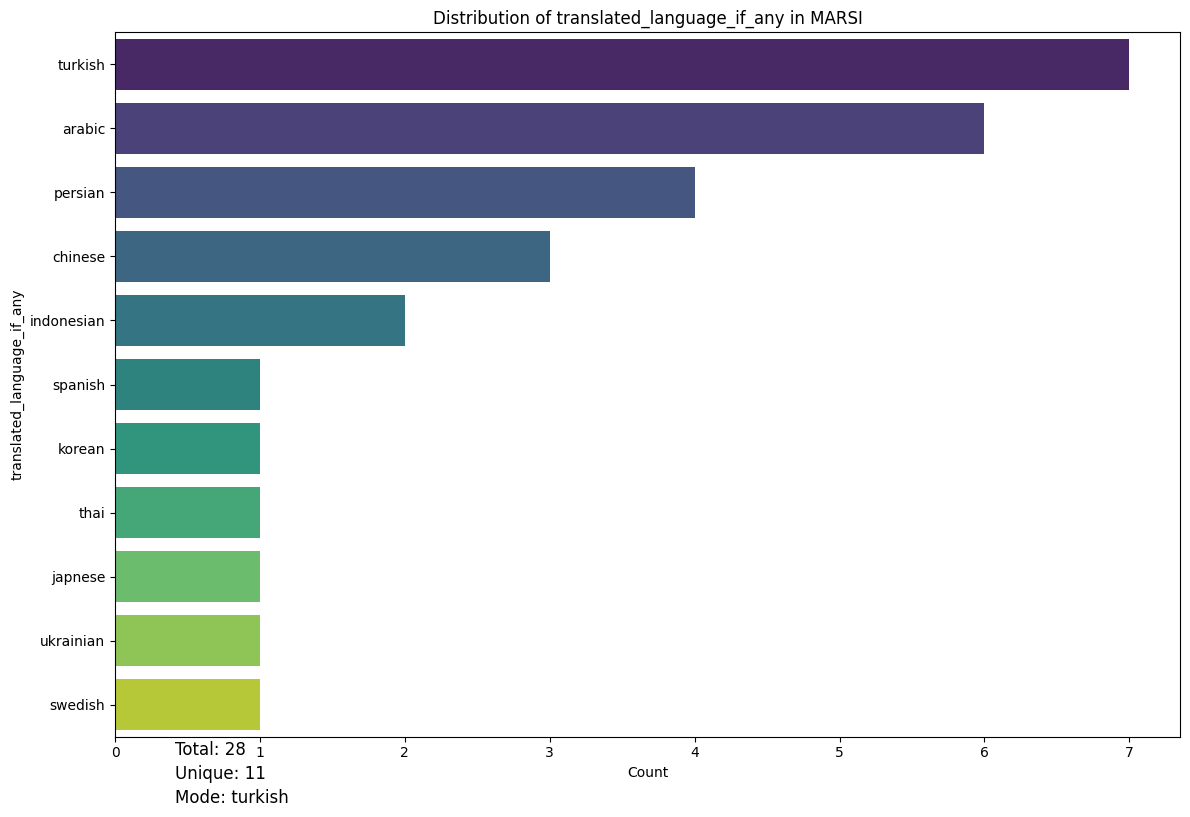

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


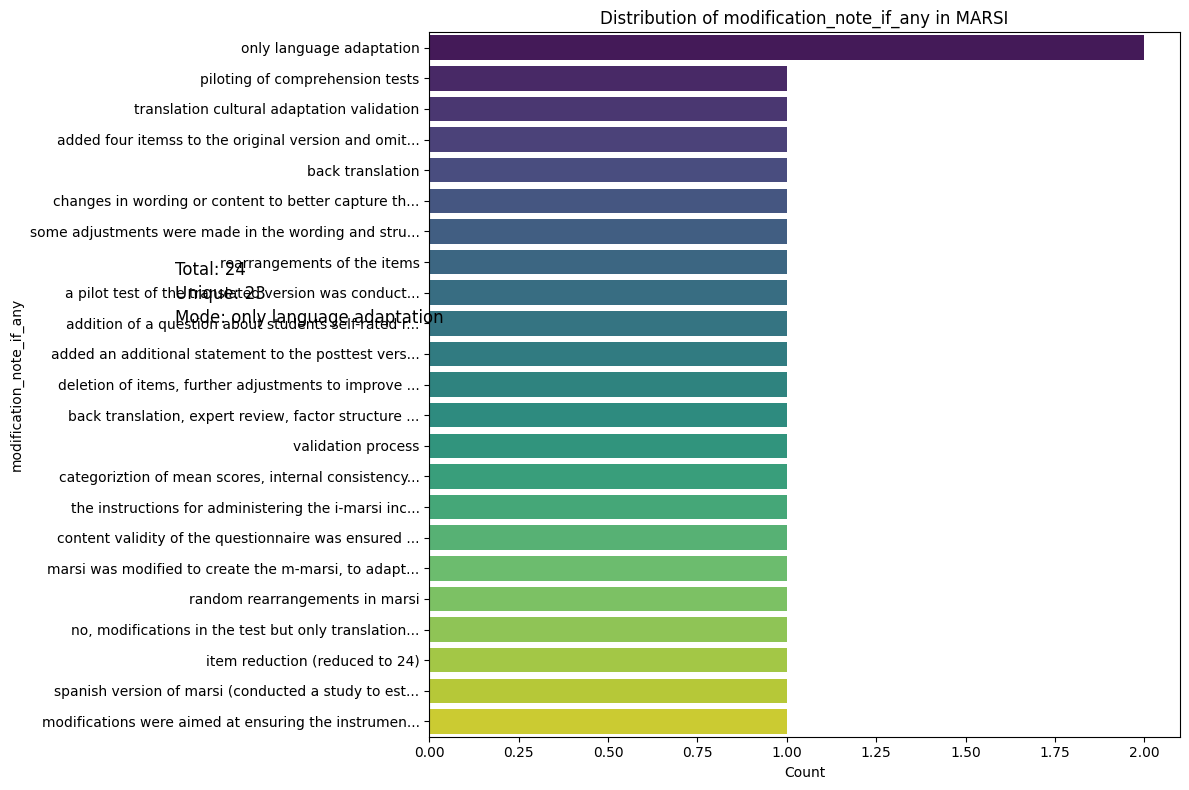

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


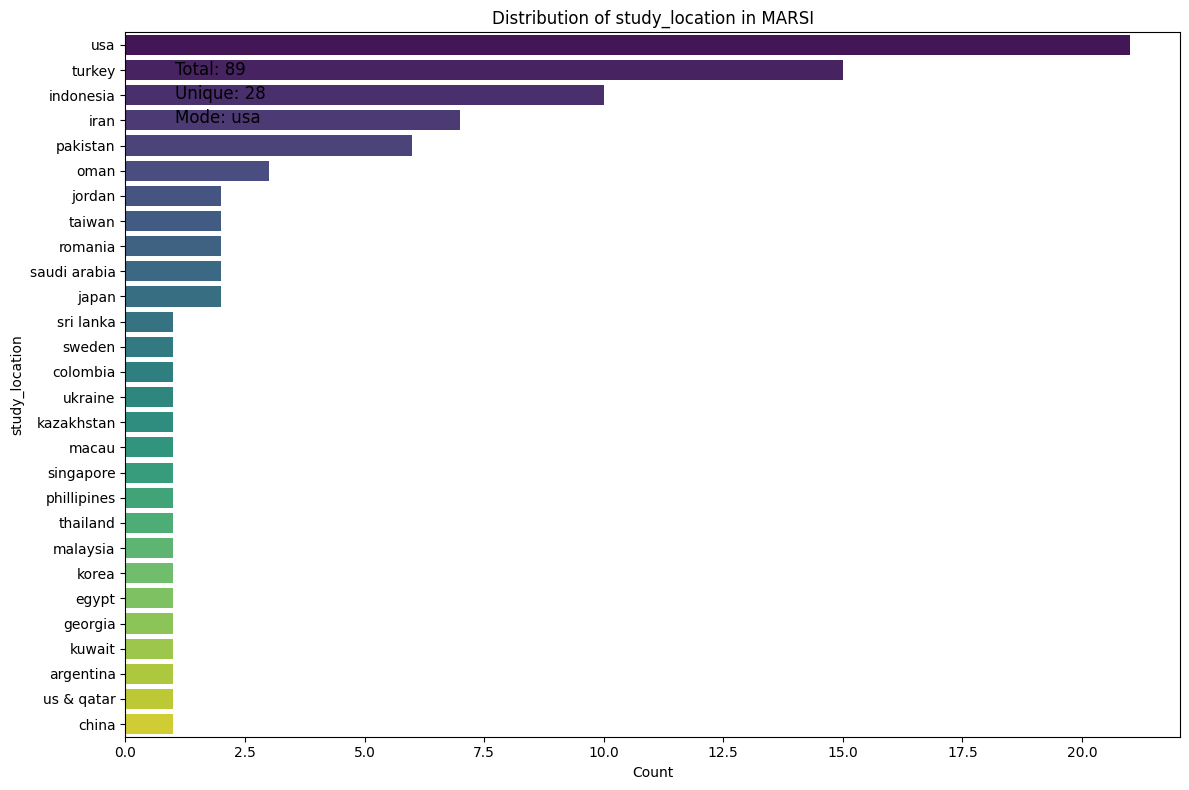

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


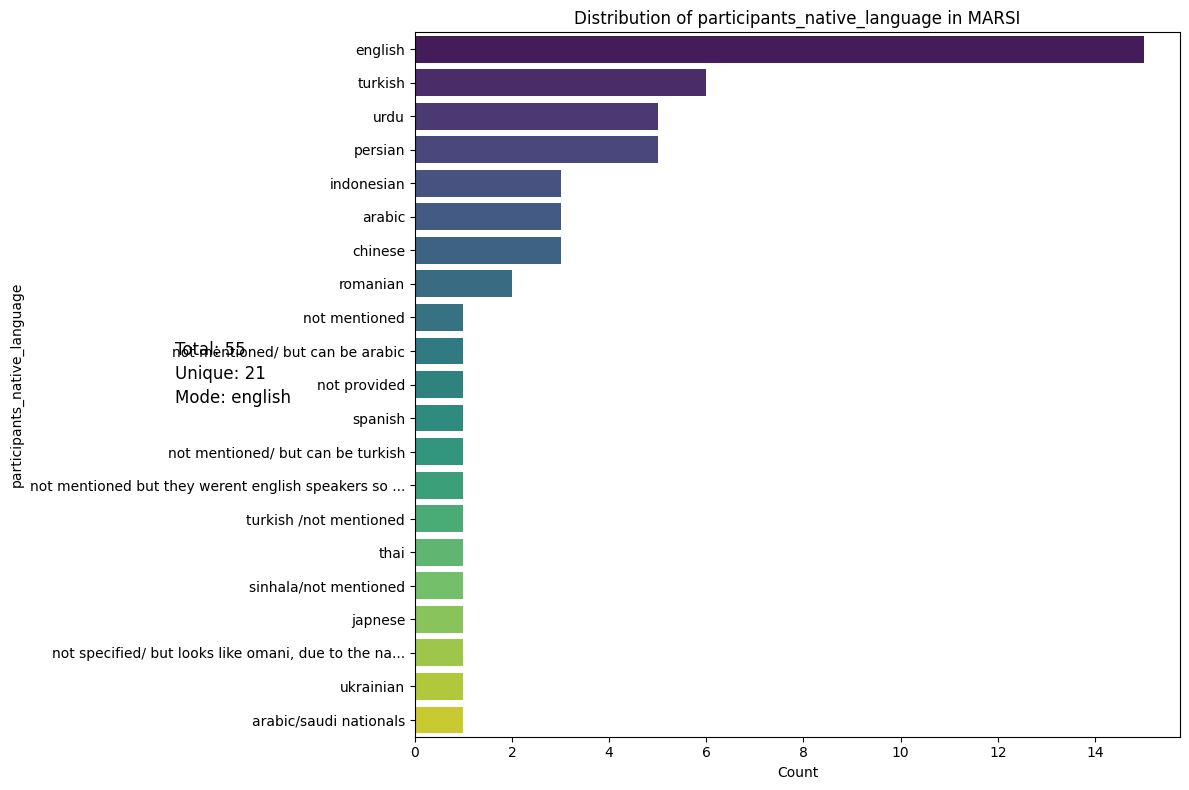

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


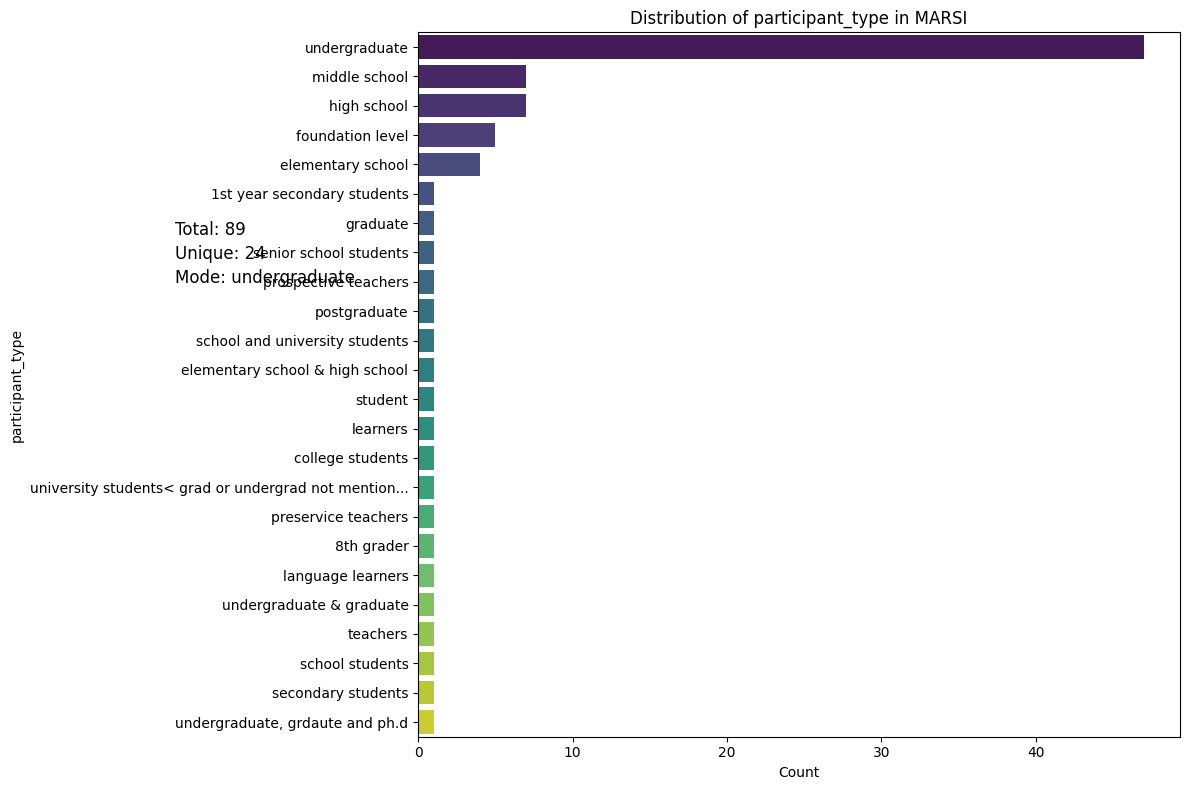

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


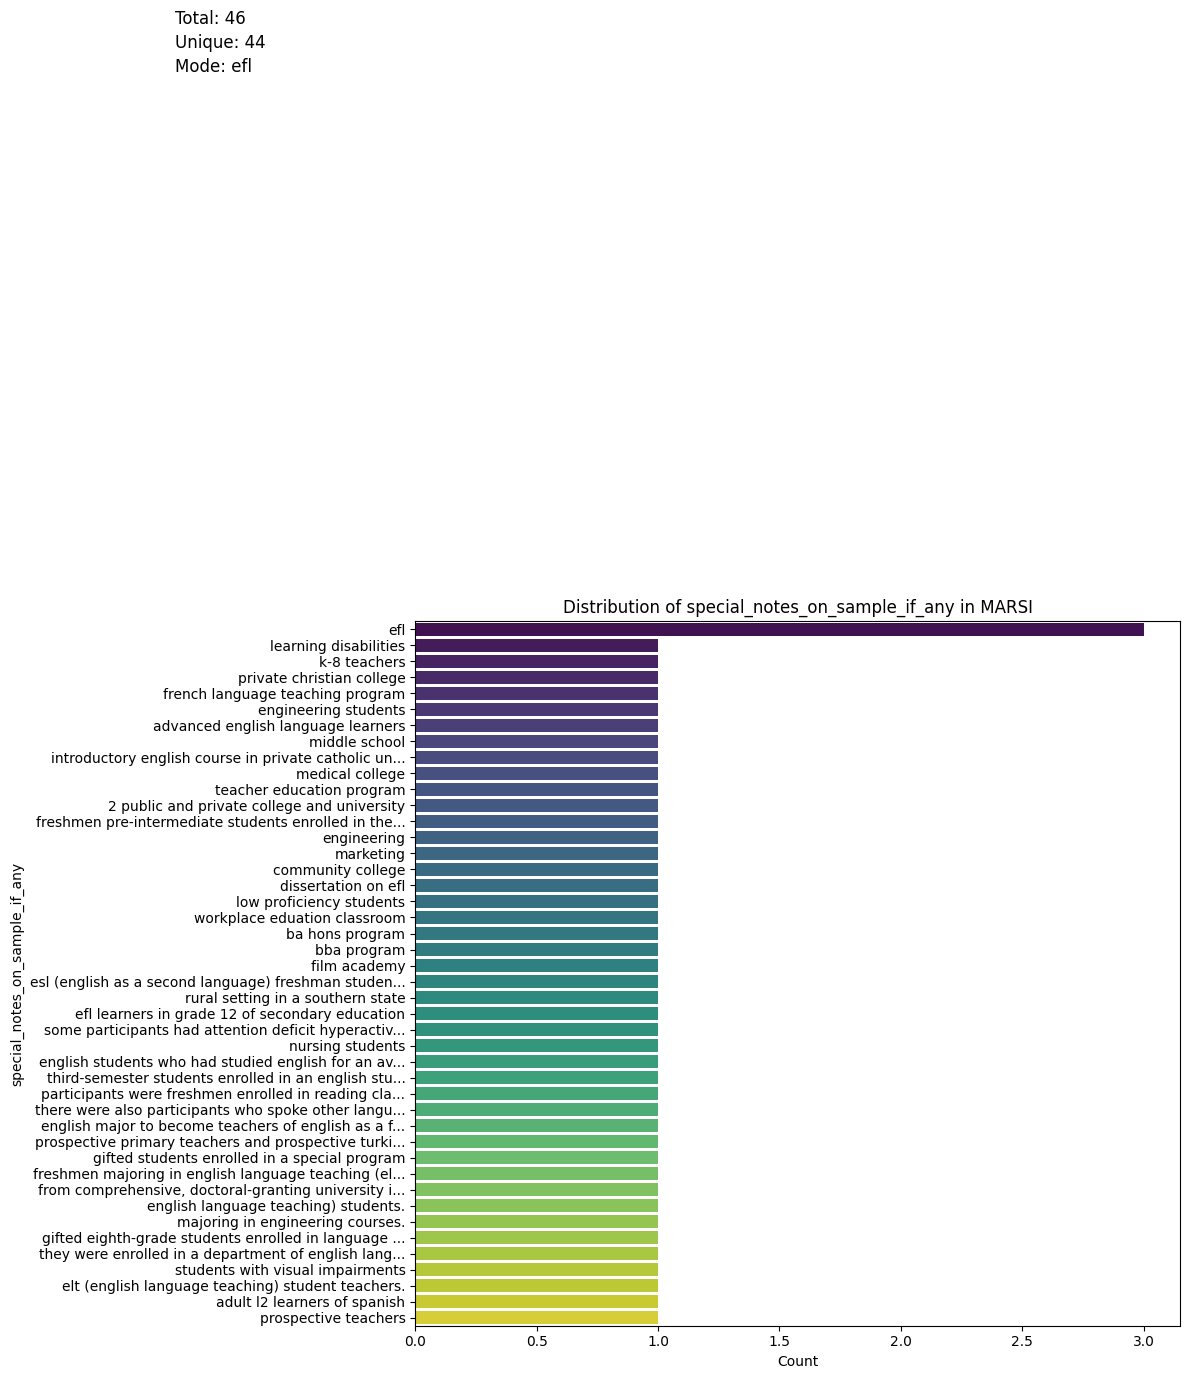

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


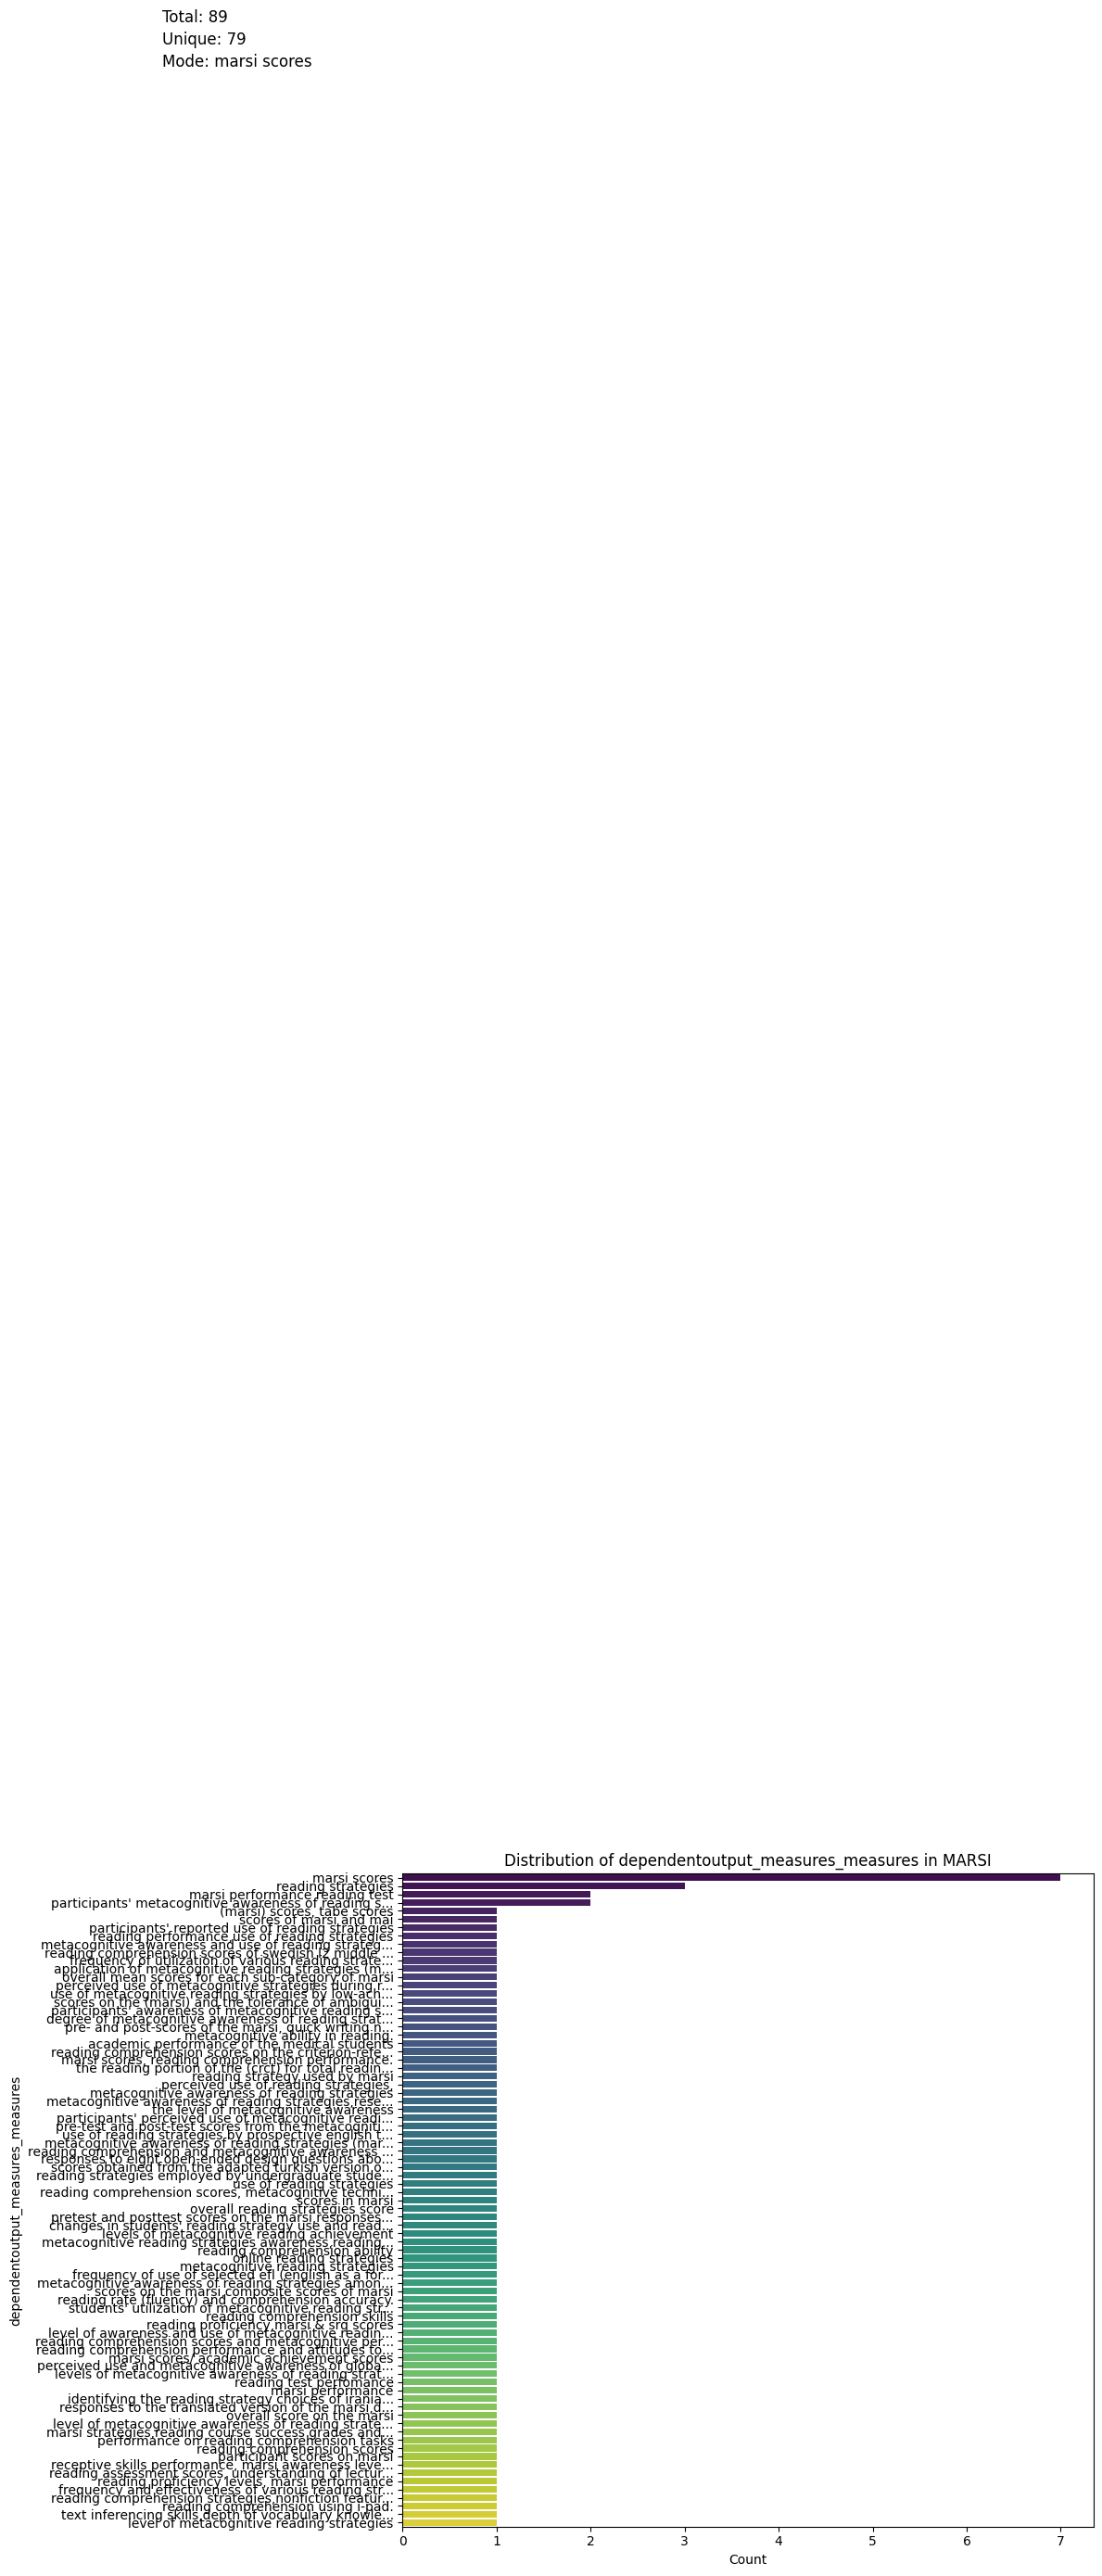

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


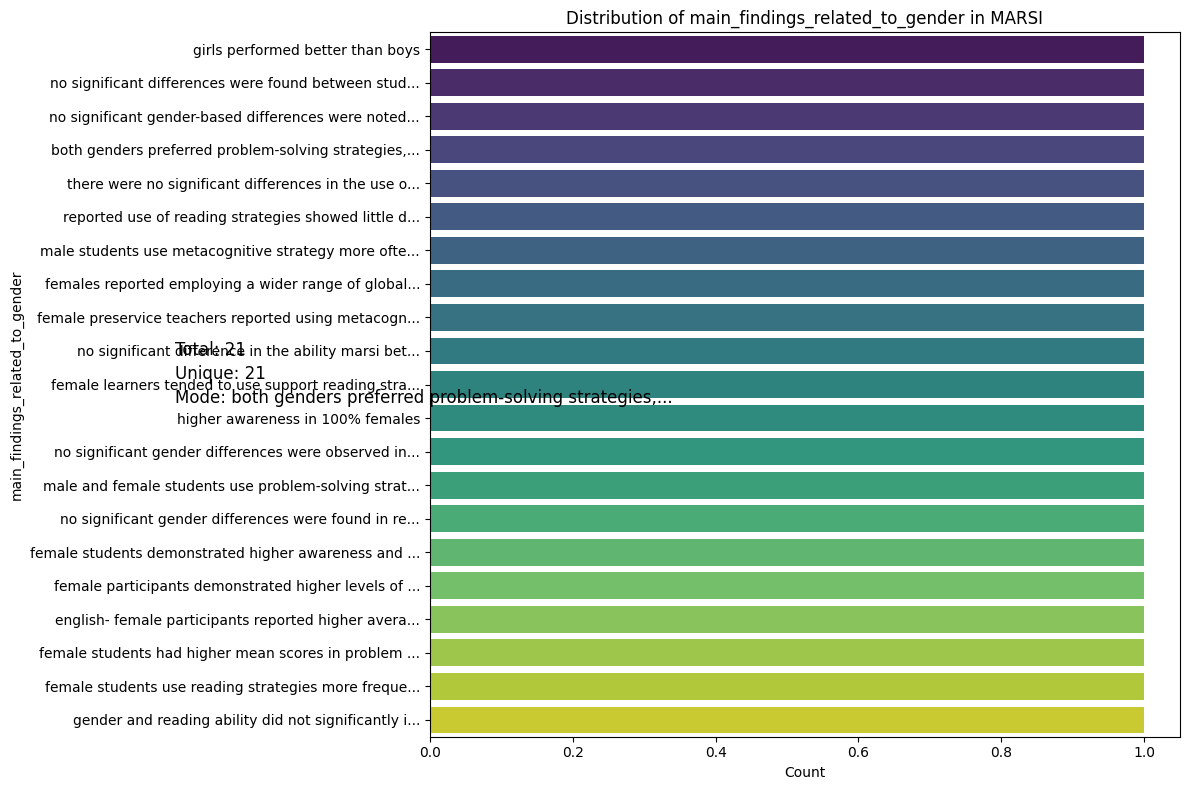

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


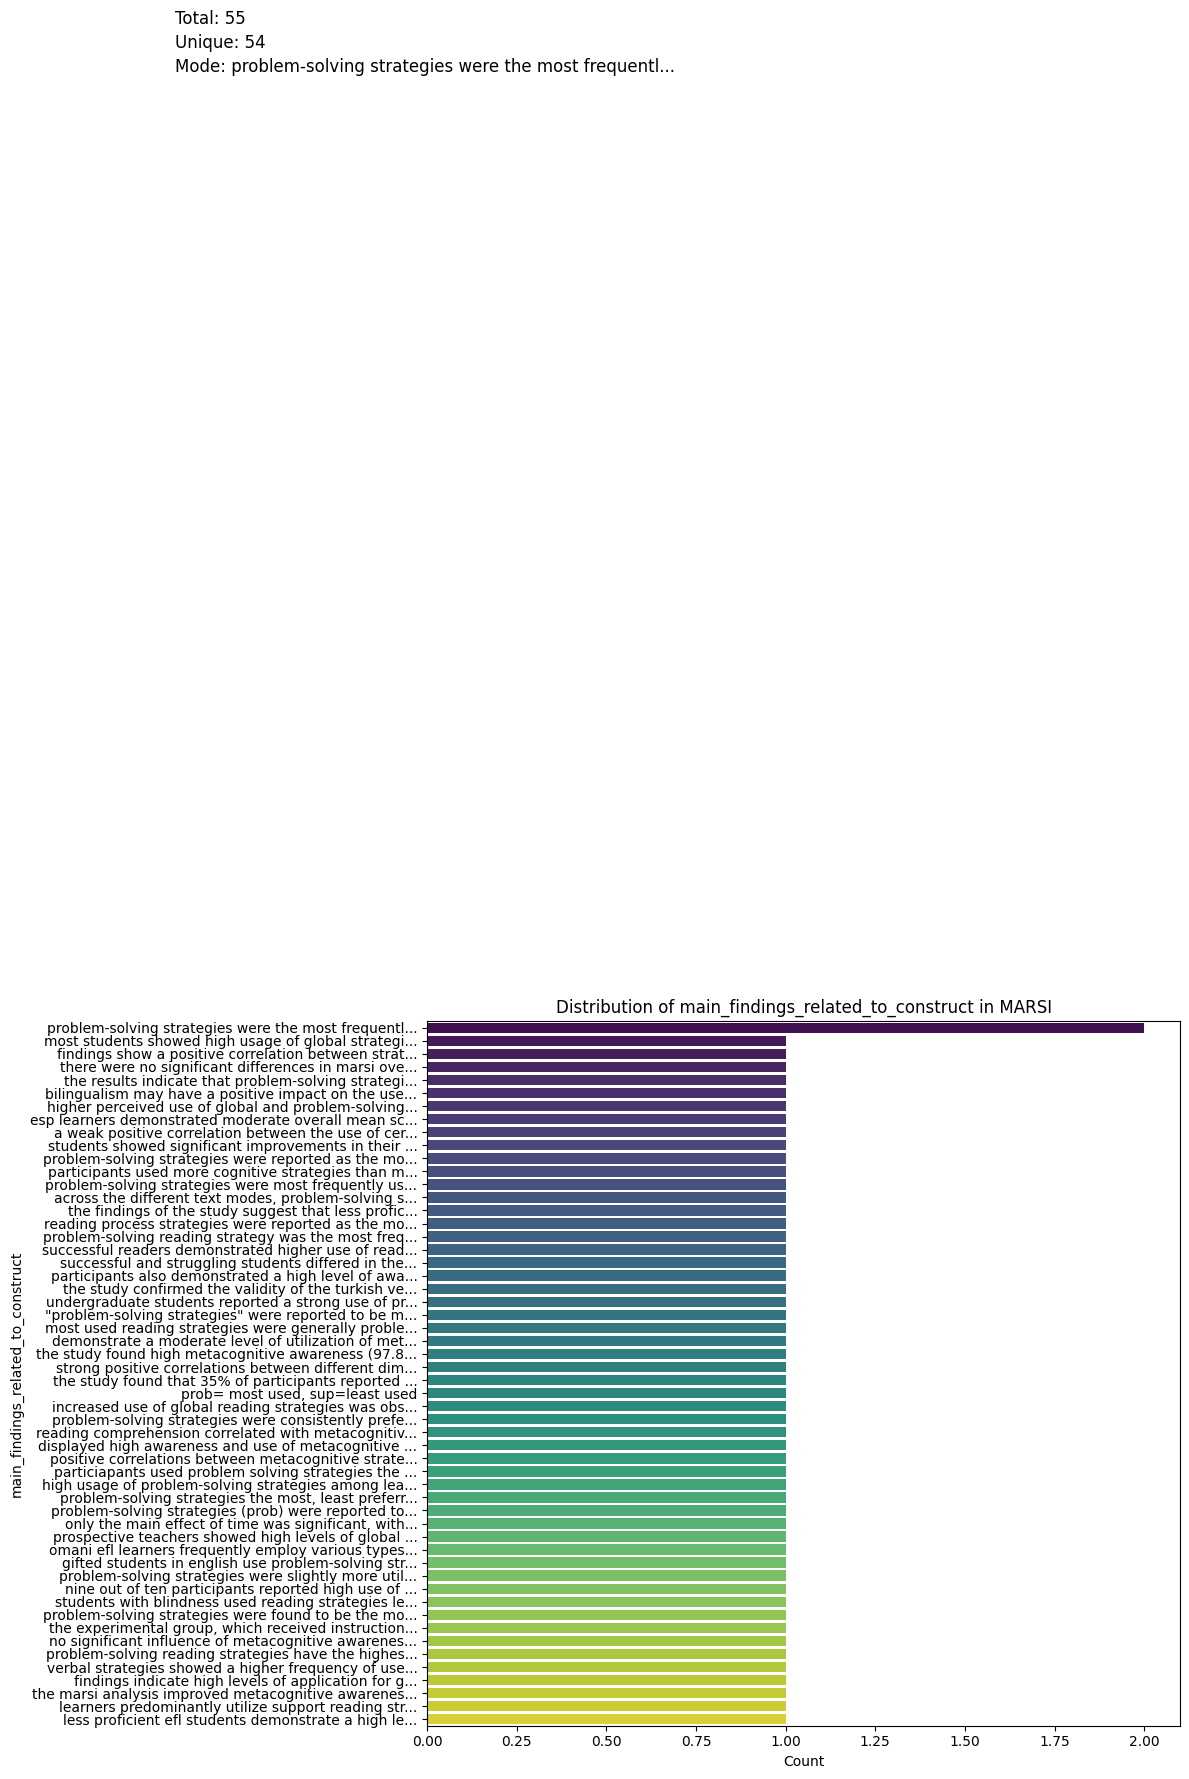

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


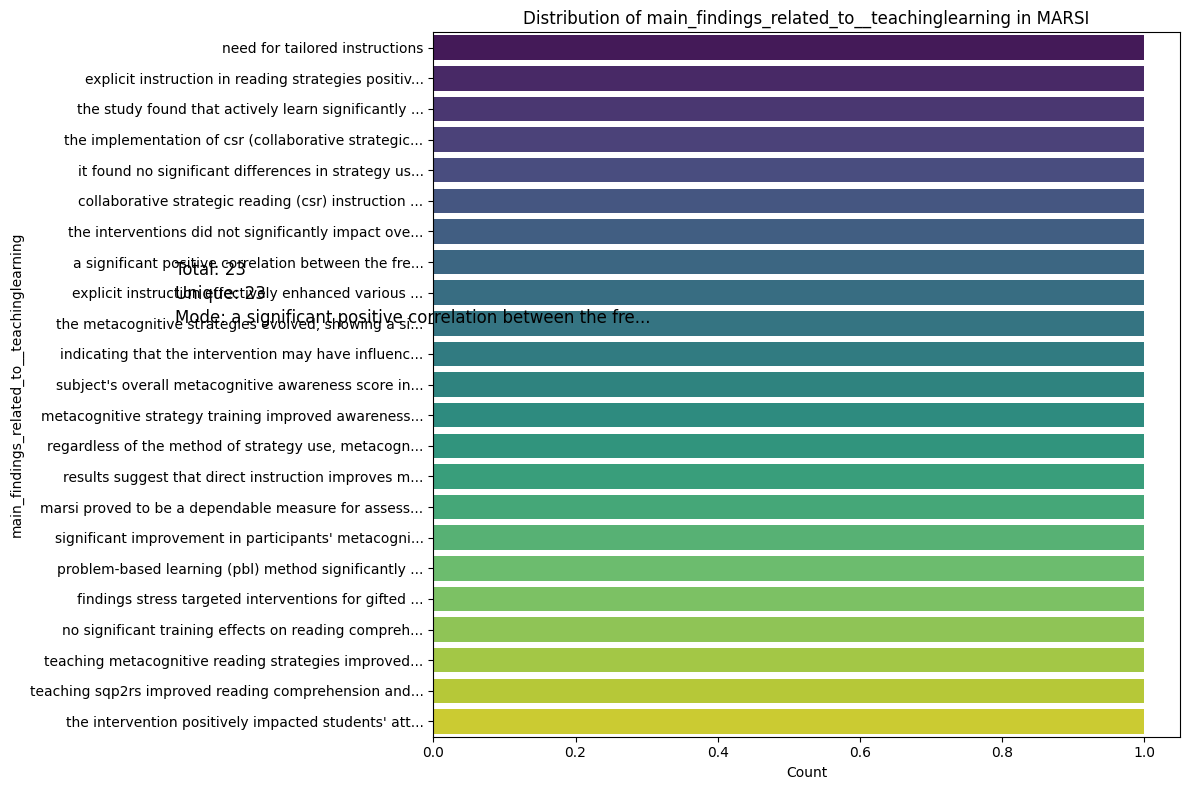

<ipython-input-55-a633998afada>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='viridis')


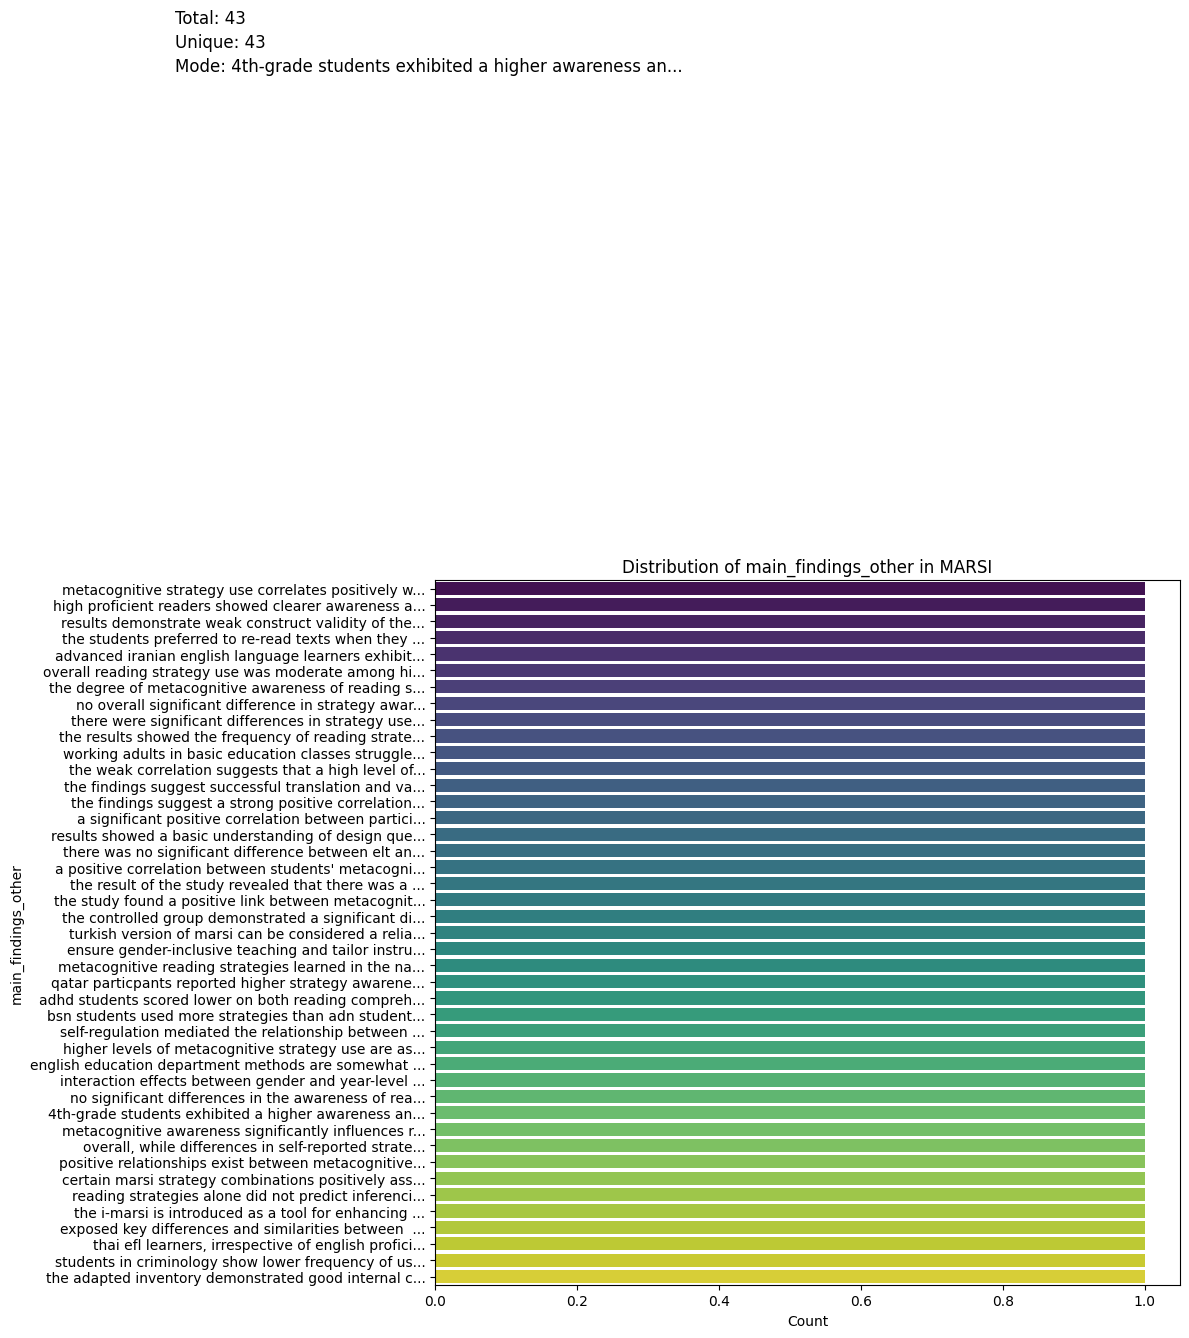

KeyError: 'dependent_output_measures_measures'

In [ ]:
# Verify column names
print("Columns in SORS dataset:", sors_data.columns)
print("Columns in MARSI dataset:", marsi_data.columns)

# Plot categorical data for both datasets
categorical_columns_sors = sors_data.select_dtypes(include=['object']).columns
categorical_columns_marsi = marsi_data.select_dtypes(include=['object']).columns

for col in categorical_columns_sors:
    if col not in ['male', 'female', 'average'] and sors_data[col].nunique() >= 10:
        plot_categorical_data(sors_data, col, 'SORS')

for col in categorical_columns_marsi:
    if col not in ['male', 'female', 'average'] and marsi_data[col].nunique() >= 10:
        plot_categorical_data(marsi_data, col, 'MARSI')

# Plot dependent measures for both datasets
dependent_columns = ['dependent_output_measures_measures']  # Correct the column name if needed
for col in dependent_columns:
    plot_dependent_measures(sors_data, col, 'SORS')
    plot_dependent_measures(marsi_data, col, 'MARSI')

# Generate frequency tables for "Main Findings" columns
main_findings_columns = [
    'main_findings_related_to_gender',
    'main_findings_related_to_construct',
    'main_findings_related_to__teaching_learning',
    'main_findings_other'
]

generate_frequency_tables(sors_data, main_findings_columns)
generate_frequency_tables(marsi_data, main_findings_columns)

# Display tables for specific data
specific_columns = ['male', 'female', 'average']
display_tables(sors_data, specific_columns)
display_tables(marsi_data, specific_columns)

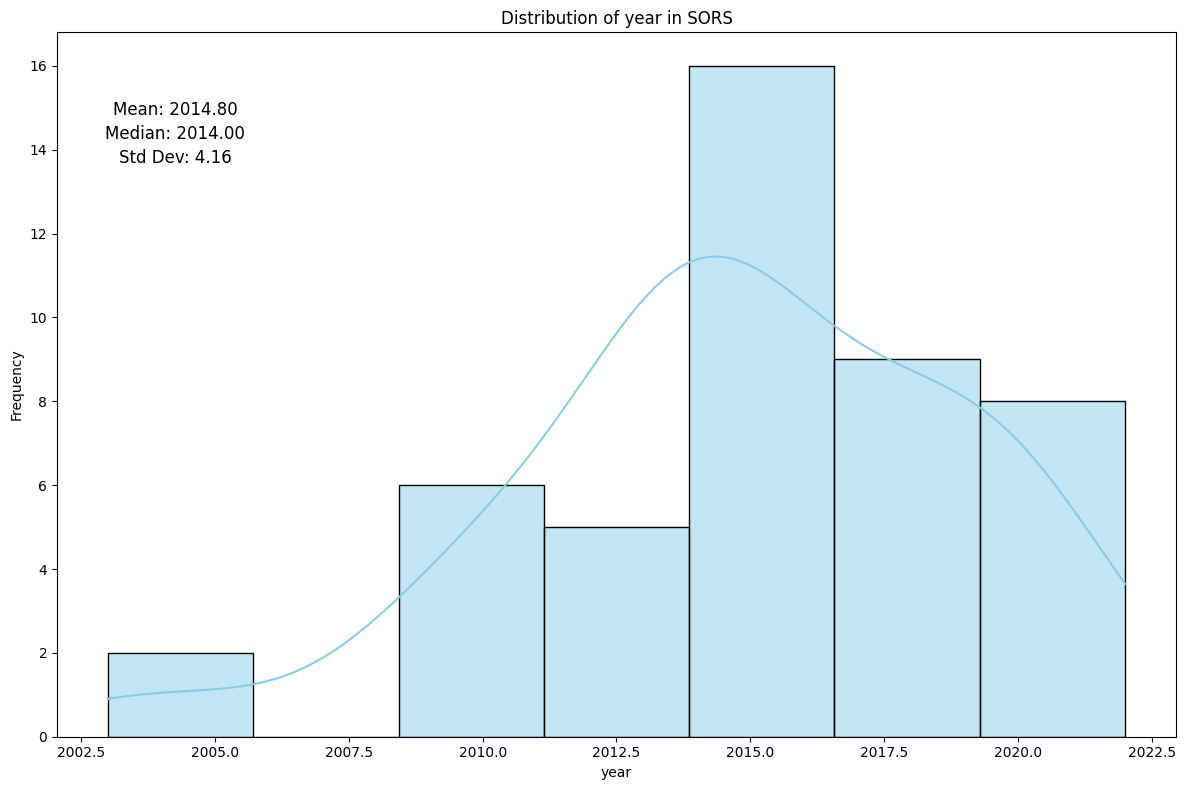

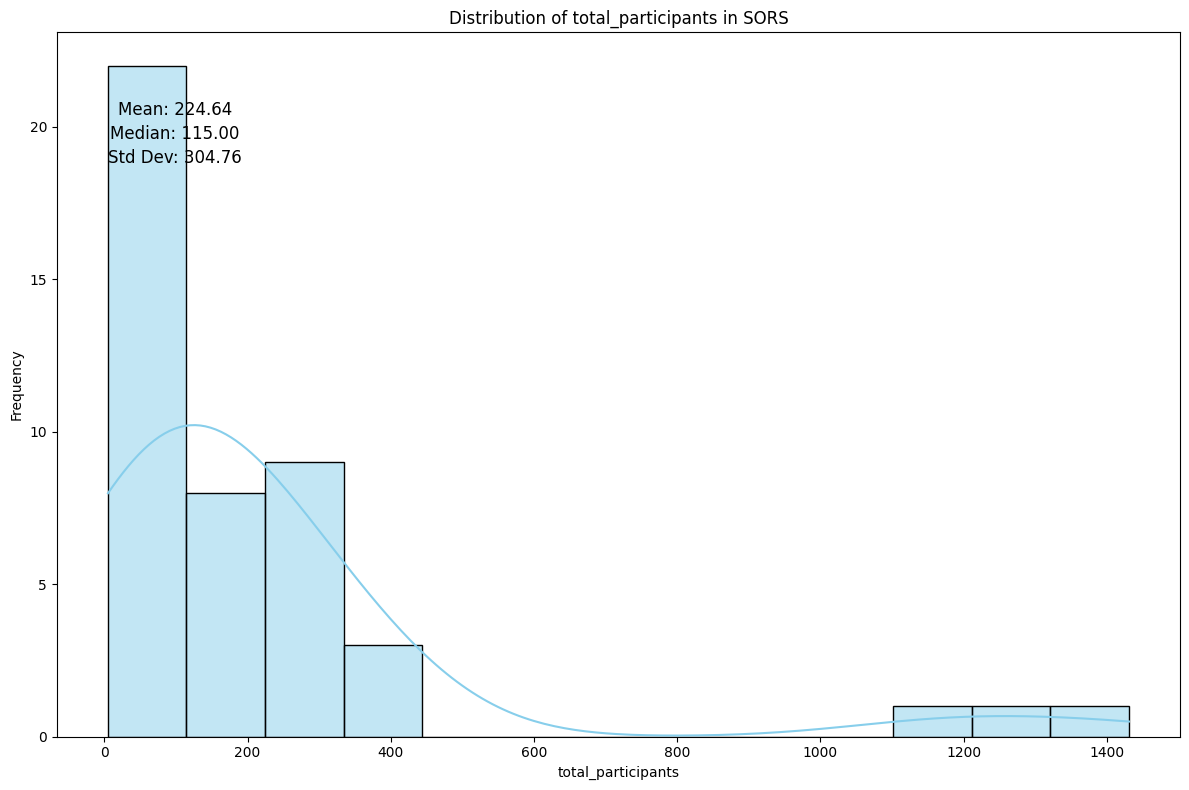

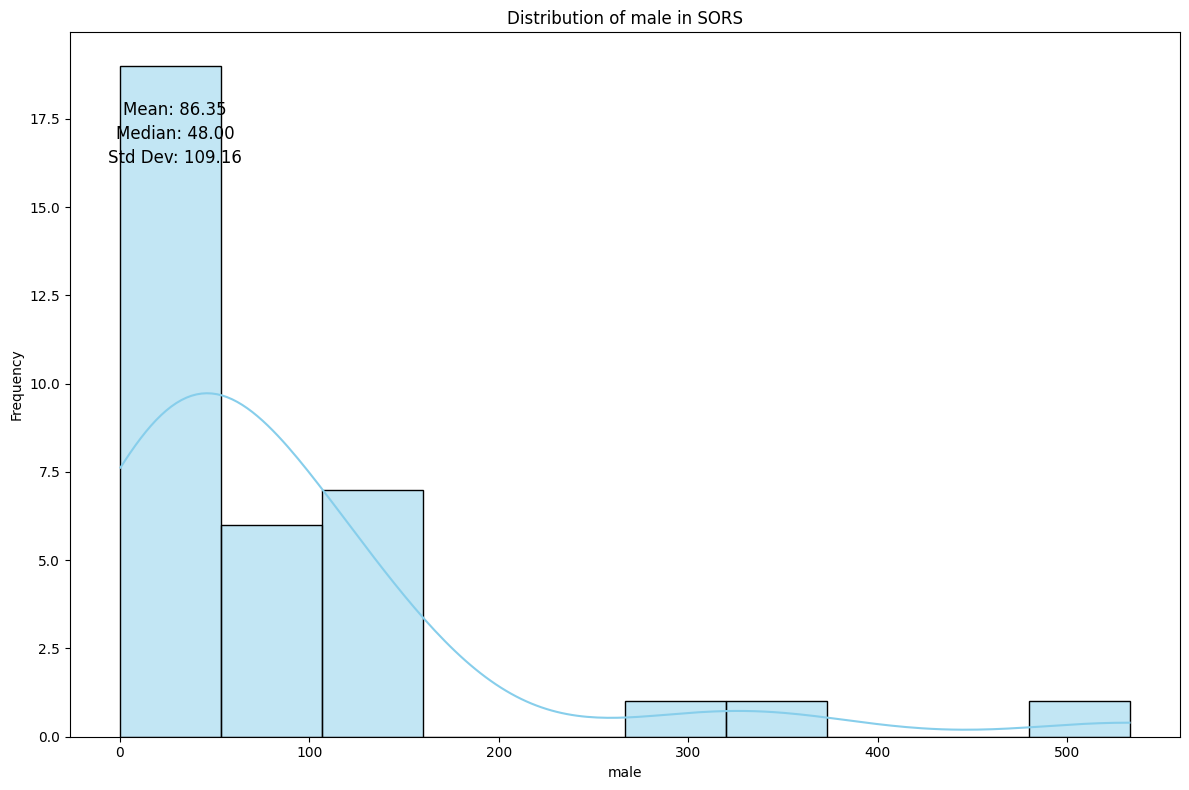

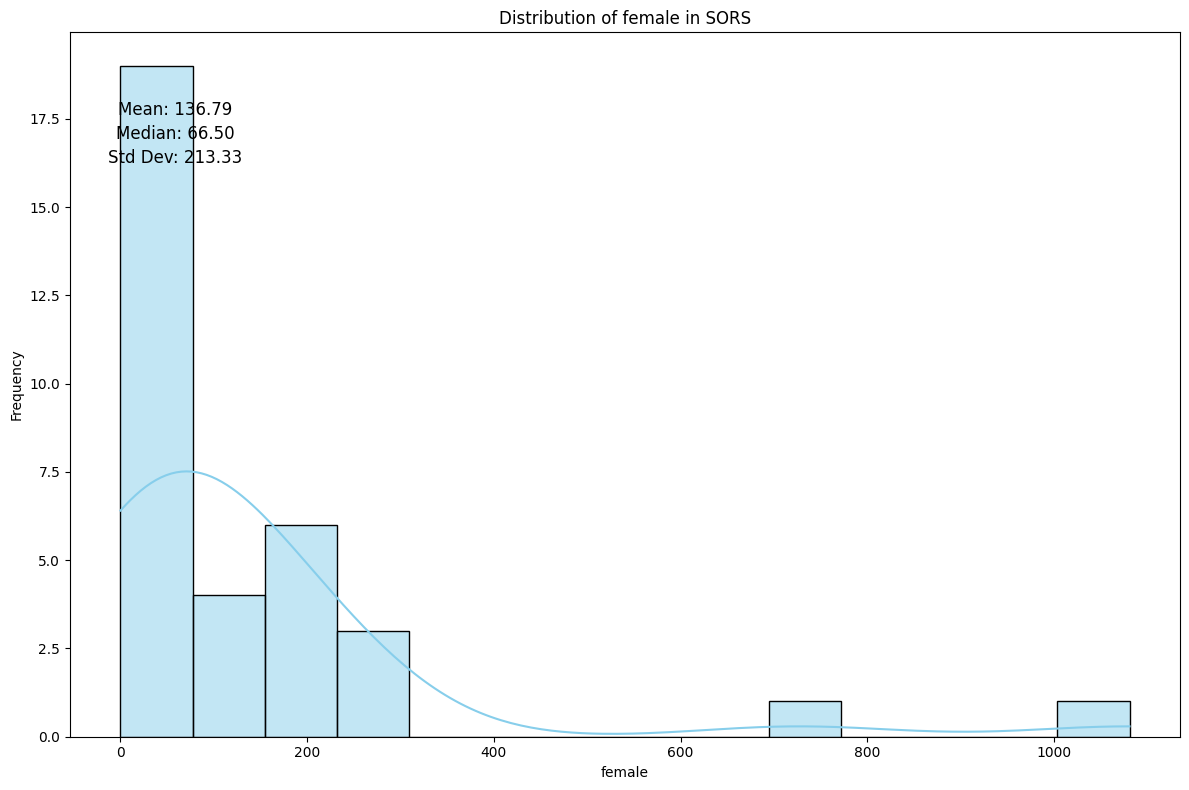

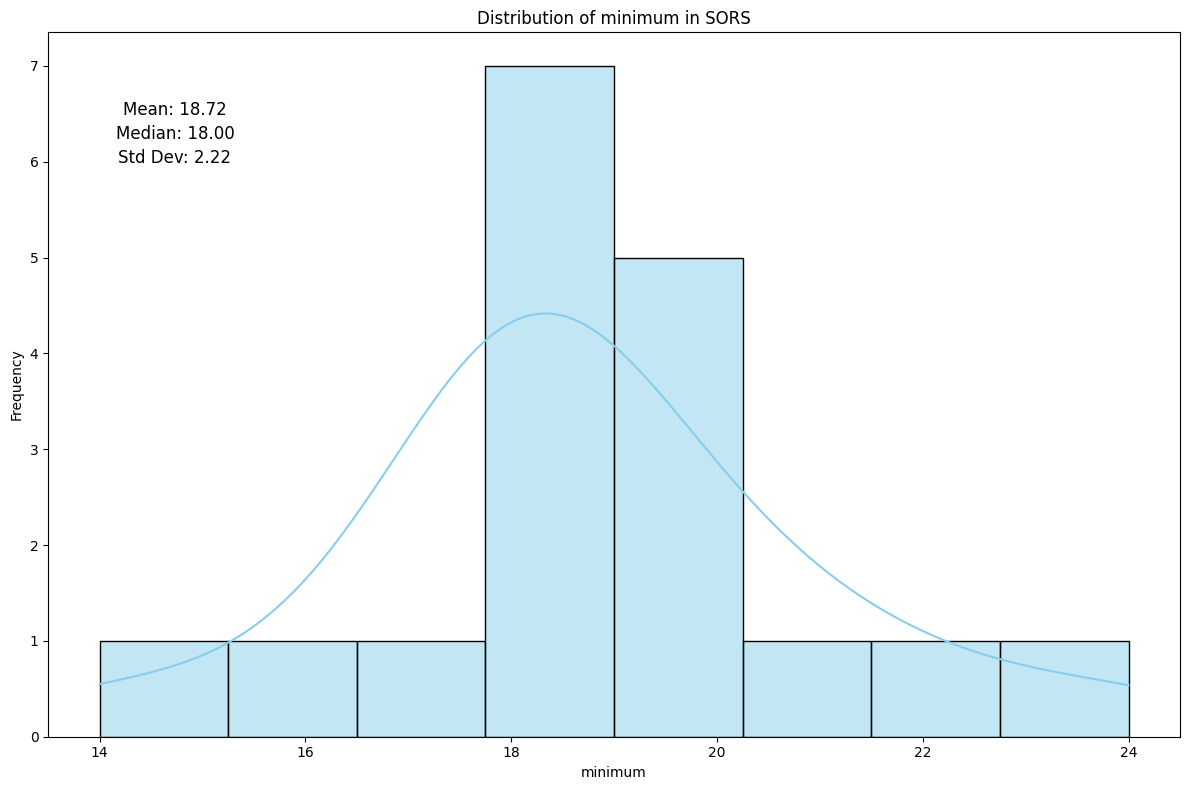

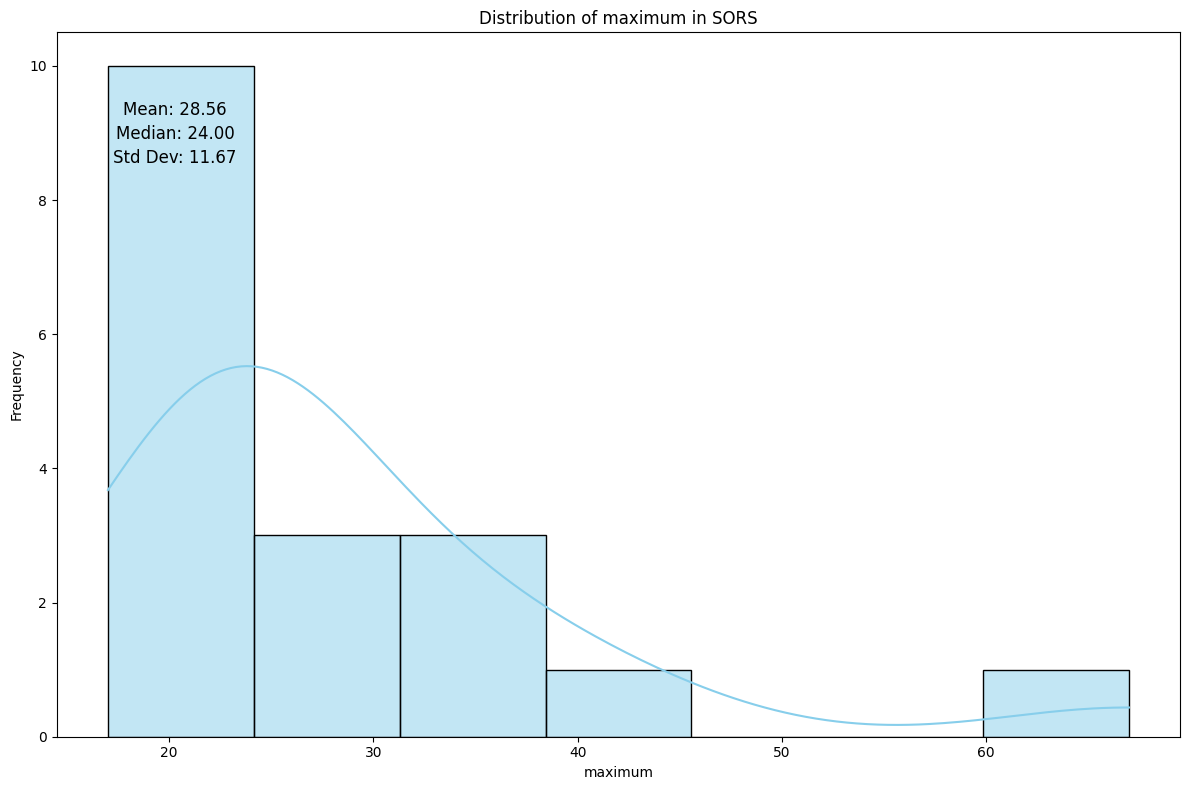

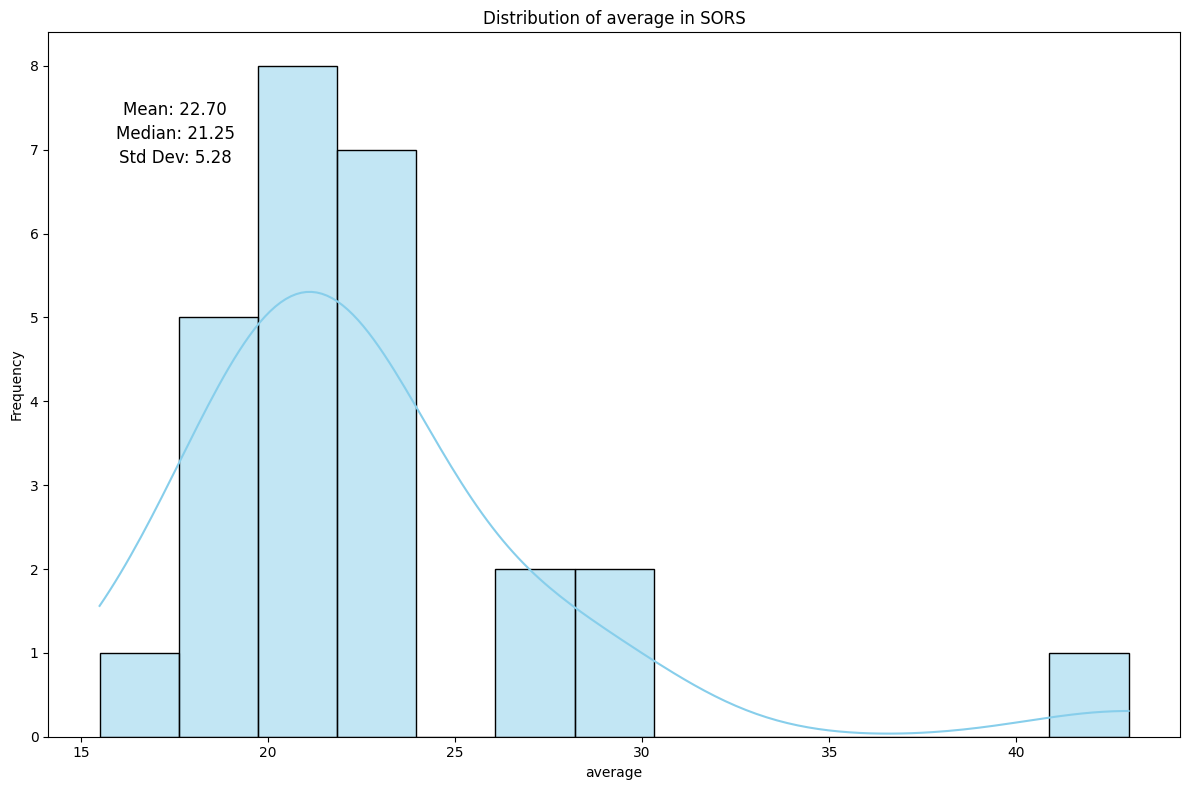

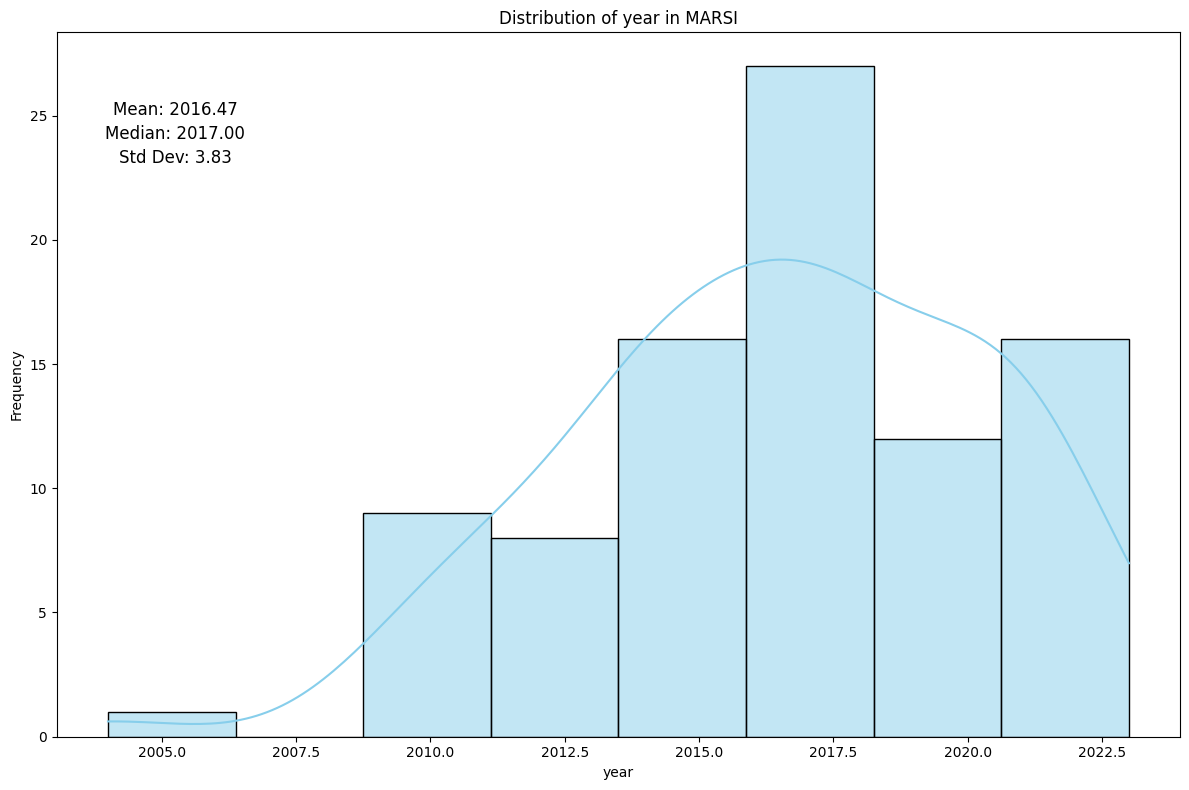

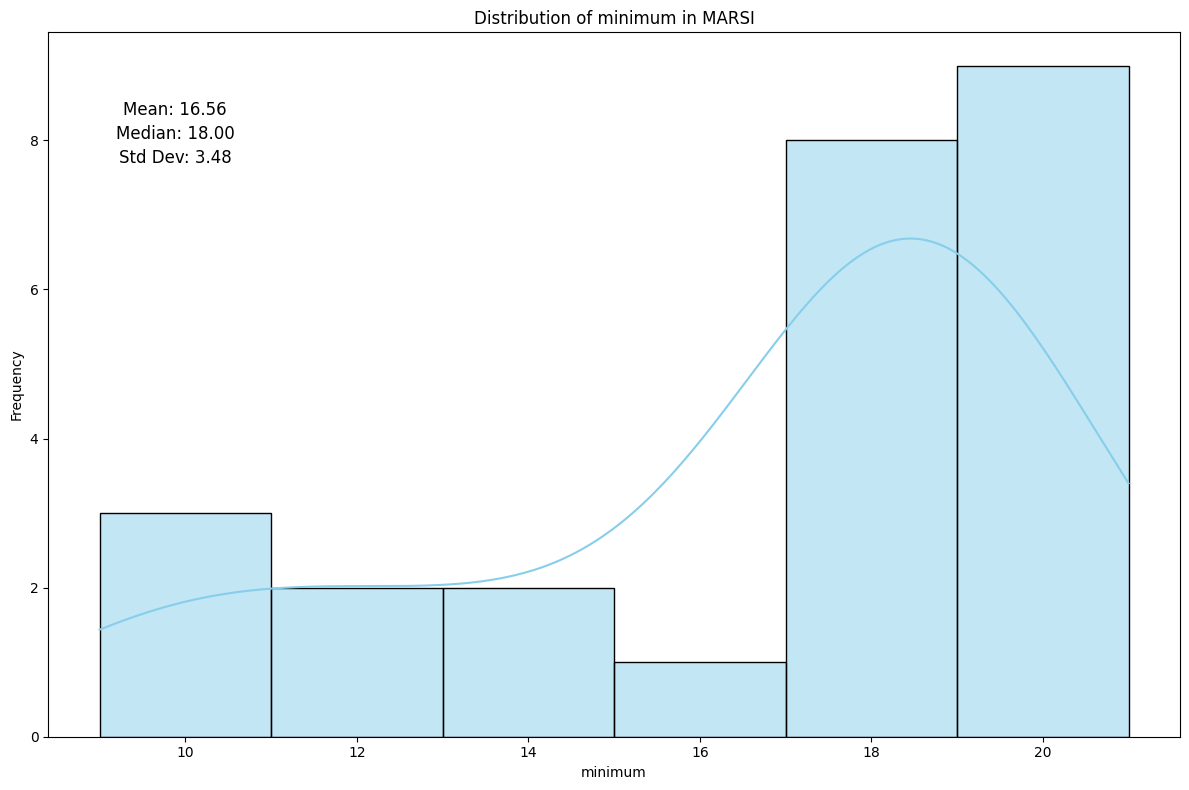

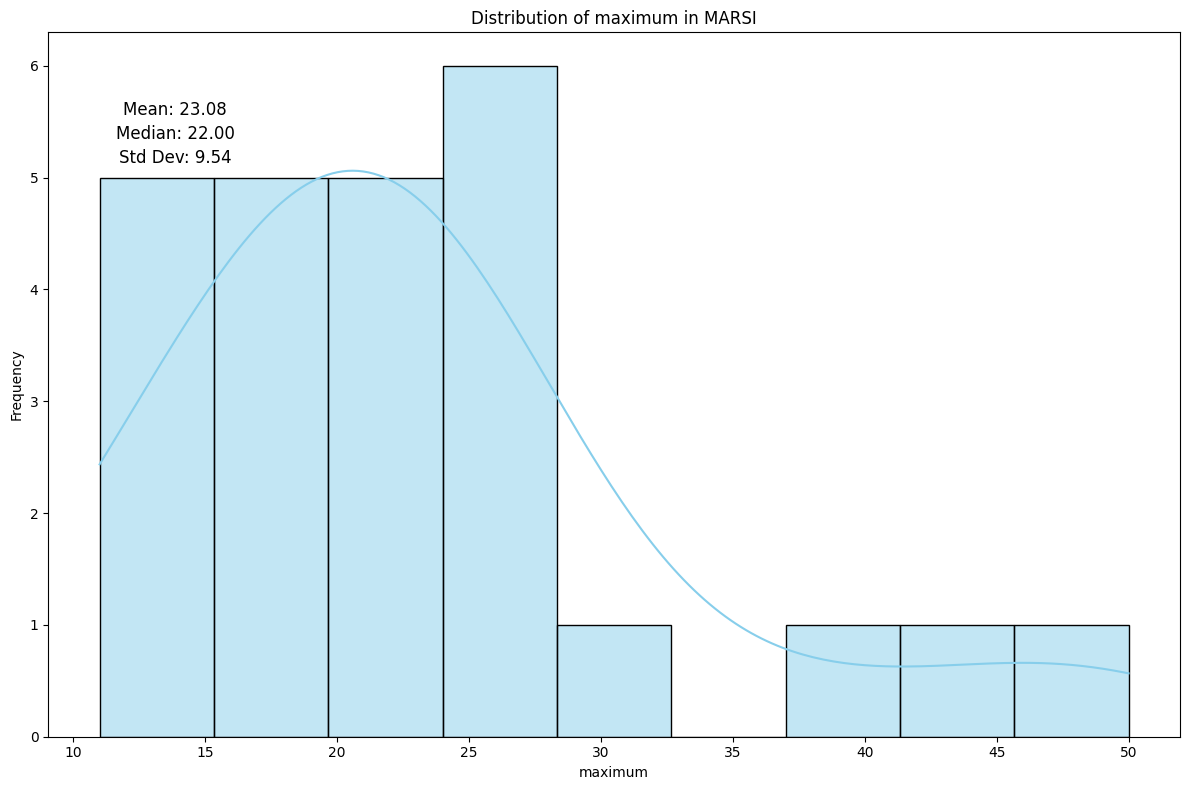

In [ ]:
# Plot numerical data for both datasets
numerical_columns_sors = sors_data.select_dtypes(include=['number']).columns
numerical_columns_marsi = marsi_data.select_dtypes(include=['number']).columns

for col in numerical_columns_sors:
    plot_numerical_data(sors_data, col, 'SORS')

for col in numerical_columns_marsi:
    plot_numerical_data(marsi_data, col, 'MARSI')